# [Bitcoin - Group 12]

Group Members:
Beyza Başak 28044 <br>
Hatice Merve Vural 27903 <br>
Alper Kaan Odabaşoğlu 28147<br>
Oğuzhan Güzelgün 28160 <br> 

## Introduction

<font color="black" size=3>
In this project, we will examine the relationship between the bitcoin marketplace and the
appearance of the coin globally. We will firstly analyze how the prices have fluctuated
throughout history. Since supply and demand is the most crucial factor that impacts the
opening and closing prices of the coin, we will try to establish a correlation between the
major political and economic events that altered the supply and demand chain of the
coin. In order to achieve our goal, we will perform a detailed analysis on each
component of the historical data (opening price, low price, high price, closing price,
volume of the bitcoin, volume of the usd) based on the daily- time component.
Moveover, we will explore how the social media traffic of the coin due to the economic
and political events affect the prices. In order to do that, data of the mentioning of
Bitcoin in the major social media platforms expecially Twitter will be utilized. Finally, we
will use the information we gathered through our data exploration and analysis process
to predict the future price of Bitcoin. Our aim is to make sense of the changes in the
bitcoin market using different data sets
</font>

### Utilized Datasets

<font color="blue">
If you are using additional datasets, describe them in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps the reader understand what you are dealing with.

The datasets that are utilized in this project:

https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing

https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Ethereum.csv

https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Aave.csv

https://bitinfocharts.com/comparison/bitcoin-tweets.html#3y

We use this dataset to retrieve number of tweets that written by users with #Bitcoin per day. It includes number of tweets with #Bitcoin per day. We extracted data from the console of the webpage with some javascript commands. And then, we composed an excel file for days and number of tweets with #Bitcoin.


</font>

**Installing necessary libraries**

---




In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

# to be used as a prefix for all file I/O
path_prefix = "./drive/My Drive/CS210-Project"

Mounted at ./drive


In [ ]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime as dt
import plotly.express as px
from os.path import join

from scipy import stats
from scipy import special

%matplotlib inline





##Descriptive Analysis Of The Bitcoin Pricing Data

---



We firstly look at the head of the data to get acquainted with it and get information about the variables

###Data Features

In [ ]:
fname ="BTC-USD.csv"
df = pd.read_csv(join(path_prefix, fname))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


We get further information about the data by analysing the data type of each data column, the characteristics and mass of the data 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2755 non-null   object 
 1   Open       2755 non-null   float64
 2   High       2755 non-null   float64
 3   Low        2755 non-null   float64
 4   Close      2755 non-null   float64
 5   Adj Close  2755 non-null   float64
 6   Volume     2755 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.8+ KB


Furthermore, we investigate whether our data contains any non values, so we can perform missing value treatment on those values. However, it turns out to be our data does not contain any missing values

###Missing values

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Then, we get statistical information using the below function. By looking at the cell below; mean,standart deviation, minimum and maximum values of each data variable can be observed. It is obvious that there is a huge difference between the minimum and maximum prices of bitcoin which can be interpreted as popularity of the coin is escalated hugely troughout the last 10 years.

###Statistical Values

In [ ]:
#descriptive statistics of the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


###Correlations

After that, in order to understand the correlation between the variables we used .corr() member function on our dataframe object. In this way We get the correlations between different variables. 

In [ ]:
corrs = df.corr()
corrs

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999526,0.999121,0.998834,0.998834,0.724416
High,0.999526,1.000000,0.999051,0.999497,0.999497,0.728143
Low,0.999121,0.999051,1.000000,0.999391,0.999391,0.716700
Close,0.998834,0.999497,0.999391,1.000000,1.000000,0.723428
Adj Close,0.998834,0.999497,0.999391,1.000000,1.000000,0.723428
Volume,0.724416,0.728143,0.716700,0.723428,0.723428,1.000000


This correlation proportions are indicated in heat map below. It is used in the purpose of straightforward representation and visualisation of different data schemes.

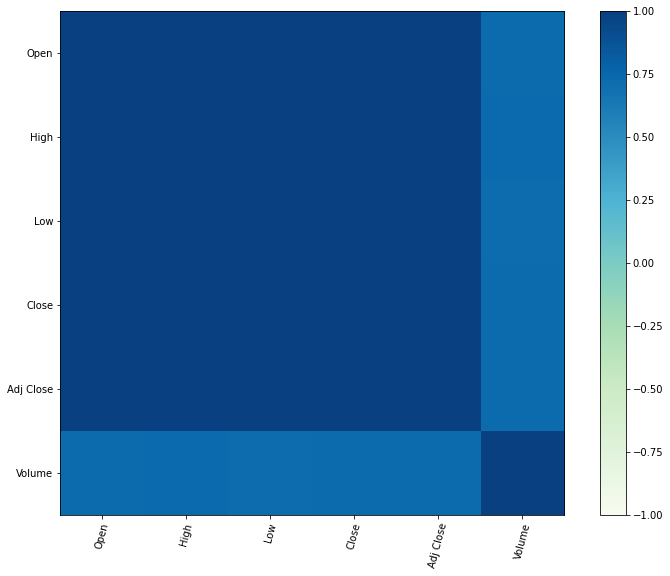

In [ ]:
#correlation for volume and closing prices
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

###Visualizations Descriptive Statistic

---







Here, we visualize each colum/variable of data in terms of time series to see how this variables have changed during the years, how the price and volume fluctuated by time. 

It can be seen that bitcoin stayed relatively steady between 2013-2019 with a little peak in the middle of 2018. However, starting from the end of the 2019, we can see that the prices of the coin has peaked. 

Also, we can intuitively say that data shows a little seasonality after 2020 since the increase and decrease of the prices shows a pattern.

We used a figure to represent all the graphs. 

In the later phases we are planning to examine whether the outbreak of COVID or the wars strictly affect the fluctuations of BTC prices. 

[Text(0, 0.5, 'Volume'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Volume Over Time')]

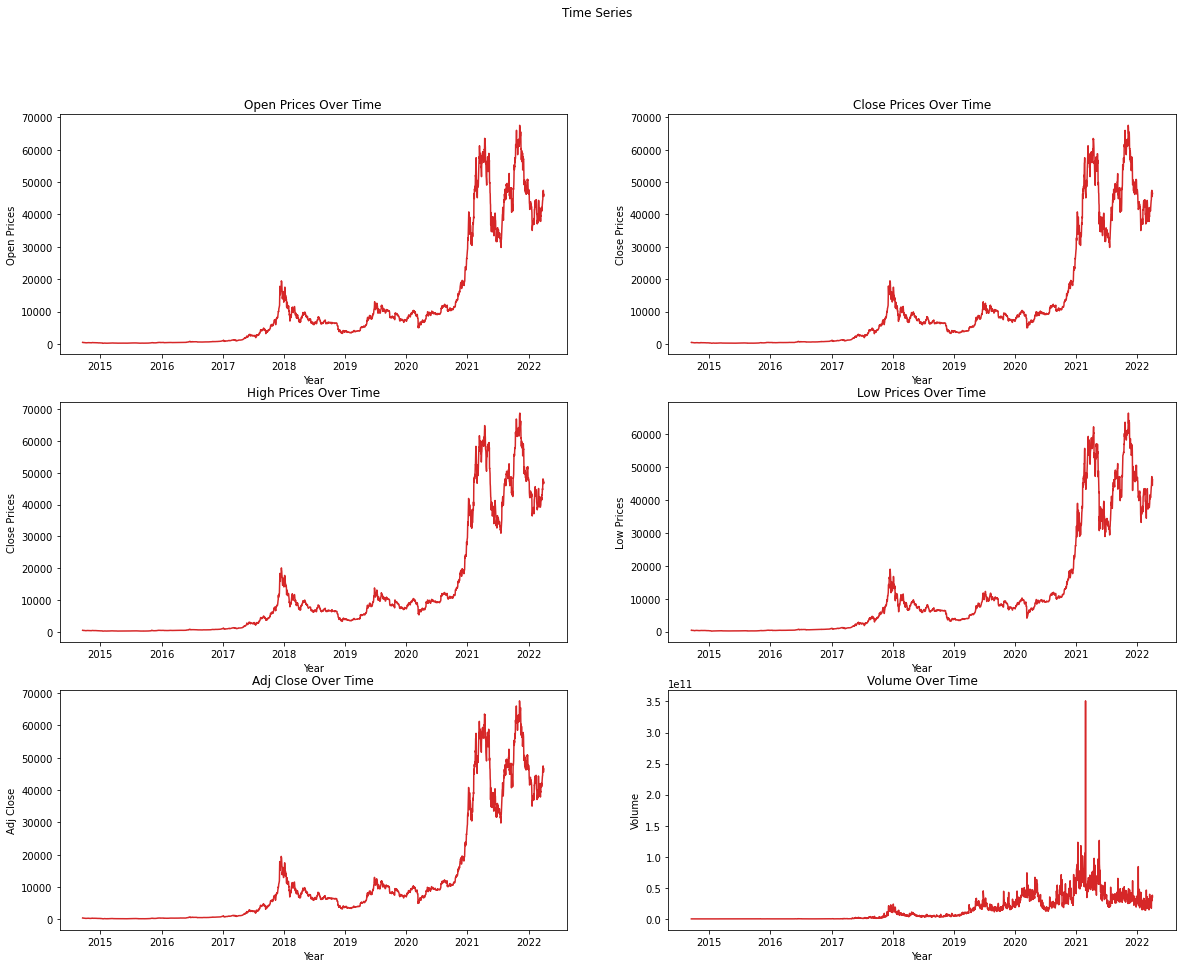

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('Time Series ')

df["Date"] = pd.to_datetime(df["Date"])
ax[0][0].plot(df["Date"], df["Open"],color='tab:red')

ax[0][0].set(xlabel="Year",
       ylabel="Open Prices",
       title="Open Prices Over Time")

ax[0][1].plot( df["Date"], df["Close"], color='tab:red')
ax[0][1].set(xlabel="Year",
       ylabel="Close Prices",
       title="Close Prices Over Time")

ax[1][0].plot( df["Date"], df["High"], color='tab:red')
ax[1][0].set(xlabel="Year",
       ylabel="Close Prices",
       title="High Prices Over Time")

ax[1][1].plot( df["Date"], df["Low"], color='tab:red')
ax[1][1].set(xlabel="Year",
       ylabel="Low Prices",
       title="Low Prices Over Time")

ax[2][0].plot( df["Date"], df["Adj Close"], color='tab:red')
ax[2][0].set(xlabel="Year",
       ylabel="Adj Close",
       title="Adj Close Over Time")

ax[2][1].plot( df["Date"], df["Volume"], color='tab:red')
ax[2][1].set(xlabel="Year",
       ylabel="Volume",
       title="Volume Over Time")

Also, we observed an strange behaviour of volume at the first quarter of 2021 by looking at the Volume Over Time graph. This cleary indicates an outlier. This outlier can be misleading when we apply statictical analysis to the data. So, we decided to investigate what may have cause to this outlier at the next step of our project to decide how to treat it.

For now, we eliminate the outlier to examine the volume more correcty.We constructed a copy of our dataframe without the outlier for not to change the original dataframe. 

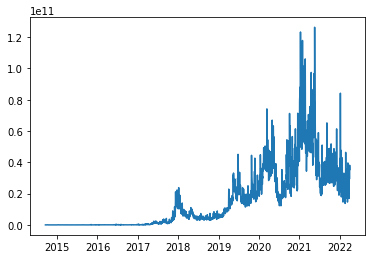

In [ ]:
outlier = df["Volume"].max()
i = df[(df["Volume"] == outlier)].index
df.drop(i)
df_without_outlier = df.drop(i)
df_without_outlier["Date"] = pd.to_datetime(df_without_outlier["Date"])
ax = plt.plot(df_without_outlier["Date"], df_without_outlier["Volume"])


        

To enhance our examination, we use histograms to represent the frequency of each variable. All of the given variables in main dataset are used in this context. We can see a right skewed behavior in general when we look at the outcome, this shows that at one point there is an extreme increase for all table variables and after that point, it fluctuates. When we look all the histograms below we can see that similar behaviour is traced. So it can be a intuition for the interpretation of the relationship of data points. 

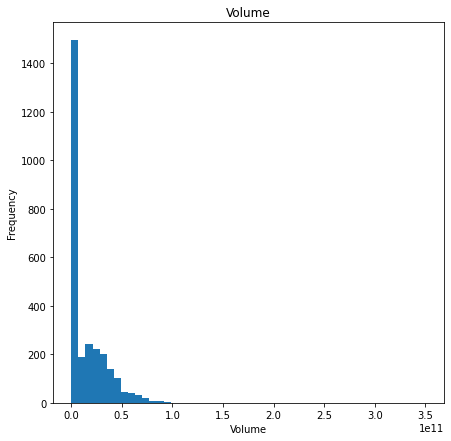

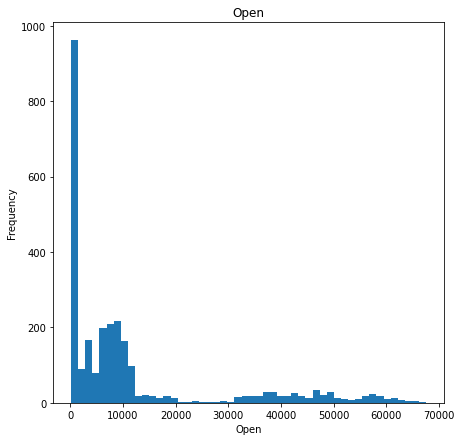

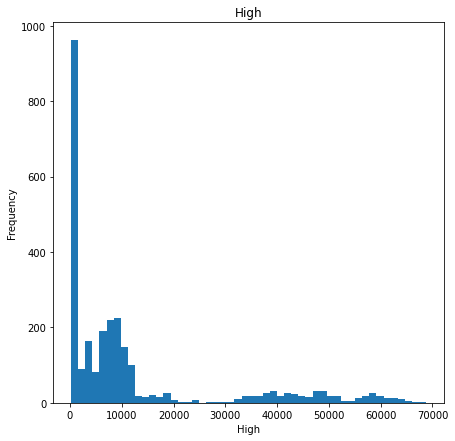

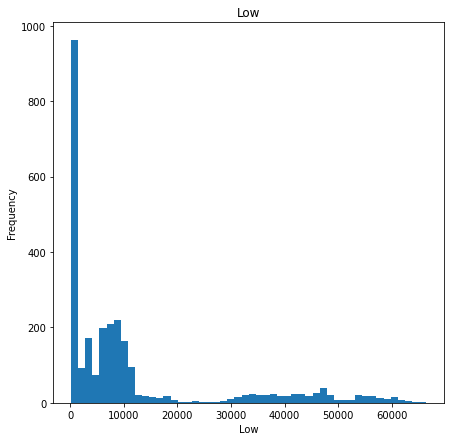

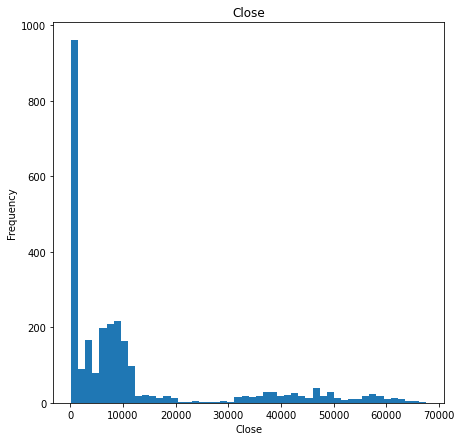

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

ax = df['Volume'].plot.hist(bins = 50, figsize = (7,7))
ax.set_title('Volume')
ax.set_xlabel('Volume')
plt.show()

ax = df['Open'].plot.hist(bins = 50, figsize = (7,7))
ax.set_title('Open')
ax.set_xlabel('Open')
plt.show()

ax = df['High'].plot.hist(bins = 50, figsize = (7,7))
ax.set_title('High')
ax.set_xlabel('High')
plt.show()

ax = df['Low'].plot.hist(bins = 50, figsize = (7,7))
ax.set_title('Low')
ax.set_xlabel('Low')
plt.show()

ax = df['Close'].plot.hist(bins = 50, figsize = (7,7))
ax.set_title('Close')
ax.set_xlabel('Close')
plt.show()

After histograms, it would be a good idea to sketch the scatter-plots to understand whether there is a correlation between variables of data. We can see that in the first scatter-plot, Low value is taken as a dependent variable and traced with respect to the behavior of volume. An imaginary trendline is show there is a high correlation between volume and the low & high prices. In addition, there is an extreme outlier exist in first and second scatterplots which is also shown in athor graphs, around 2021. When we look at the last scatter-plot, we can see that there is no such big correlation between open price and the volume. These can be some intuition for later phases.

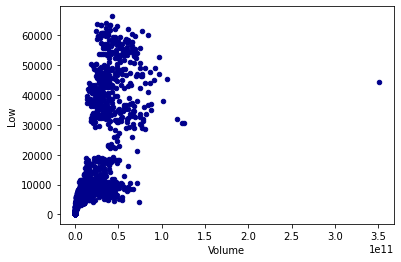

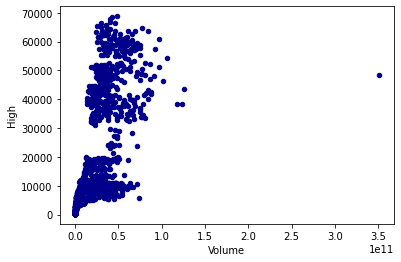

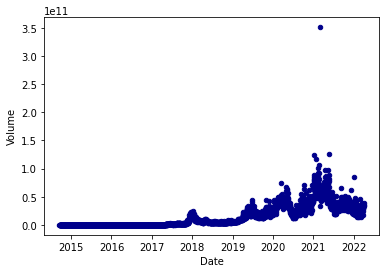

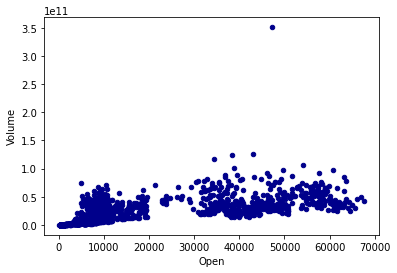

In [ ]:
ax1 = df.plot.scatter(
    x = 'Volume',
    y = 'Low',
    c = 'DarkBlue'
)
plt.show()

ax2 = df.plot.scatter(
    x = 'Volume',
    y = 'High',
    c = 'DarkBlue'
)
plt.show()

ax2 = df.plot.scatter(
    x = 'Date',
    y = 'Volume',
    c = 'DarkBlue'
)

ax2 = df.plot.scatter(
    x = 'Open',
    y = 'Volume',
    c = 'DarkBlue'
)
plt.show()

In [ ]:
df_without_outlier["Volume"].describe()

count    2.754000e+03
mean     1.477240e+10
std      1.888816e+10
min      5.914570e+06
25%      8.169820e+07
50%      5.253777e+09
75%      2.510771e+10
max      1.263581e+11
Name: Volume, dtype: float64

We anaylze the volume by open and close price (two histograms below). This allows us to see the distribution and shape of the volume. We can see a bimodular structure

In [ ]:
px.histogram(df, x=df["Volume"], y=df["Low"], nbins=140, orientation='h').show()

In [ ]:
px.histogram(df, x=df["Volume"], y=df["High"], nbins=150, orientation='h').show()

Here, we defined a new variable as 'PriceRange' and inserted it as a column to our dataframe. We defined PriceRange as the difference between high and low prices for each date. It basically gives the price change in a given date.

We,then, visualize the price change. We interpreted the time series graph so that there is not a obvious pattern that price change follows. We just can say that the variation of prices during the day has increased throughout the years. At years 2013-2017 we do not see a fluctuation of price during the day, whereas at the last years it changes very quickly.

[Text(0.5, 0, 'Price Range'), Text(0.5, 1.0, 'Distribution of price range')]

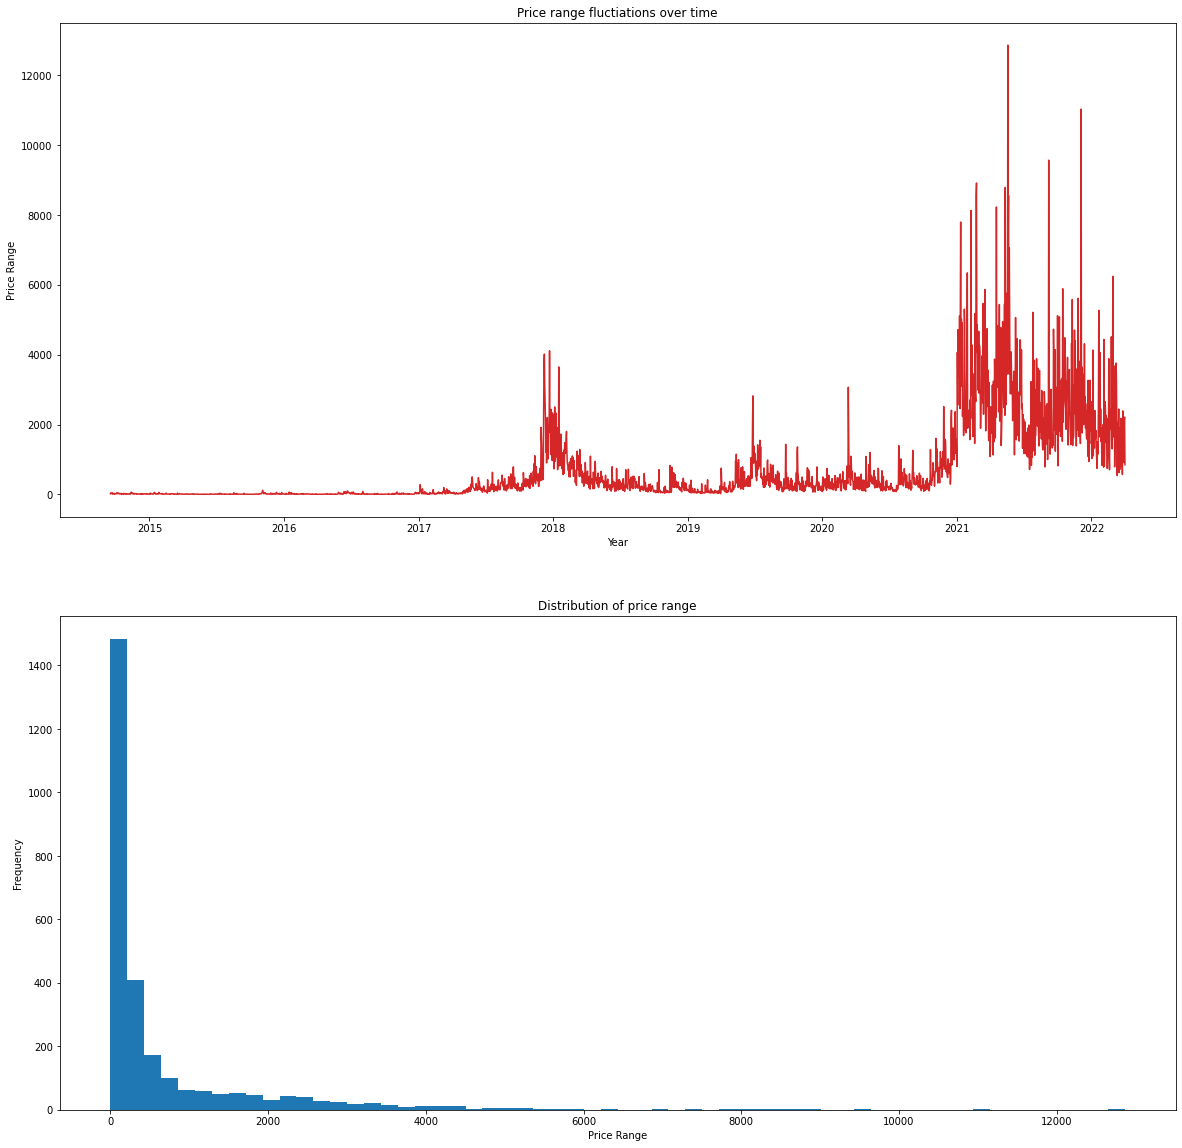

In [ ]:
df["PriceRange"] = df["High"] - df["Low"] 

df["Date"] = pd.to_datetime(df["Date"])
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.plot( df["Date"], df["PriceRange"],color='tab:red')
ax1.set(xlabel="Year",
       ylabel="Price Range",
       title="Price range fluctiations over time")
ax2 = df["PriceRange"].plot.hist(bins=60)
ax2.set(xlabel="Price Range", 
        title="Distribution of price range")

At the below, we wanted to see the how the price change and volume are related. Since we are dealing with to numerical variables, we used a scatter plot in order to visualize the relationship. 

By looking at the scatter plot, we can interpret that they are positively correlated.

Also, the we can see the same outlier that we observed in the volume by time series graph here.

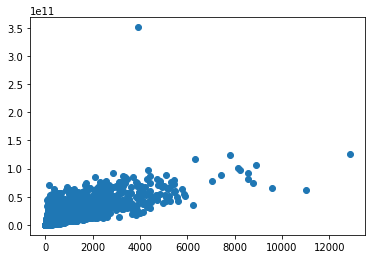

In [ ]:
plt.scatter( df["PriceRange"], df["Volume"] )

We also compared low and high prices below. They follow a similar pattern as expected

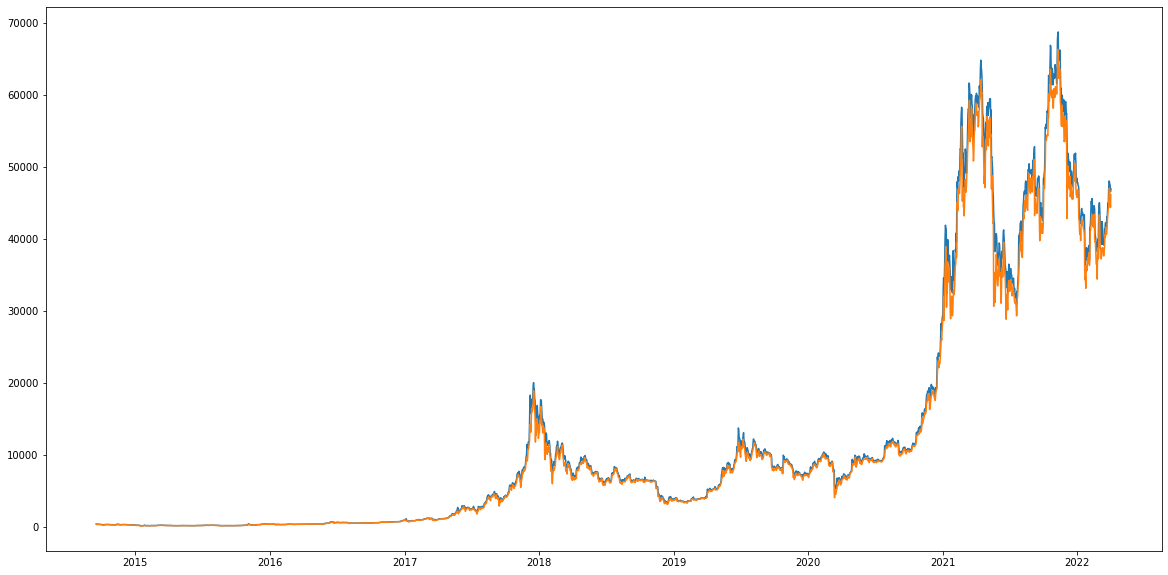

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df["Date"], df["High"],color='tab:blue')
ax.plot(df["Date"], df["Low"],color='tab:orange')

Moreover, we thought that it would be a good idea to select specific time ranges that the coin showed major peaks, increases or decreases. 

So,firsty, we decided to analyze the coin between years 2020 and 2021. It generally shows an increase.


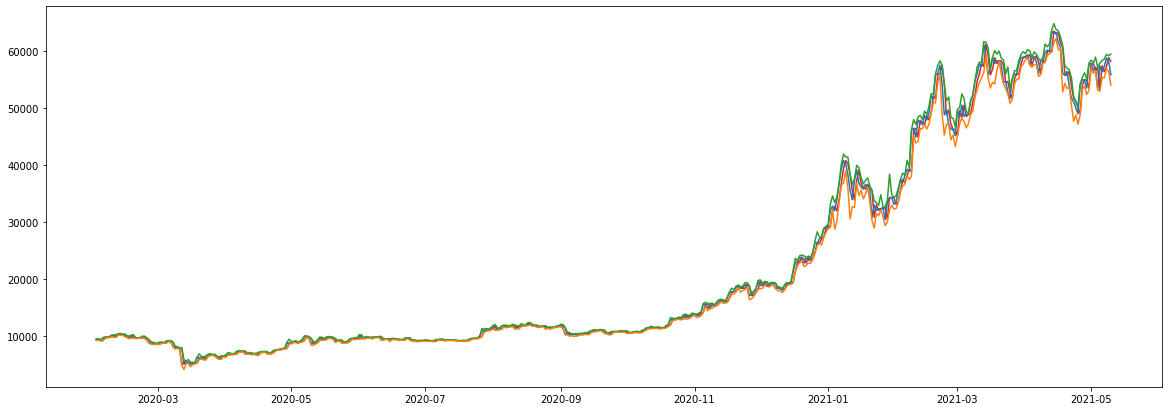

In [ ]:
start_date = '2020-02-01'
end_date = '2021-05-10'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df_selected = df.loc[mask]
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df_selected["Date"], df_selected["Open"],color='tab:red')
ax.plot(df_selected["Date"], df_selected["Close"],color='tab:blue')
ax.plot(df_selected["Date"], df_selected["High"], color='tab:green')
ax.plot(df_selected["Date"], df_selected["Low"],color='tab:orange')

Also, we wanted to examine the behaviour of coin during the beginning of 2018. We wonder that why it has a little but considerable peak during this period. The time series below serves this purpose.

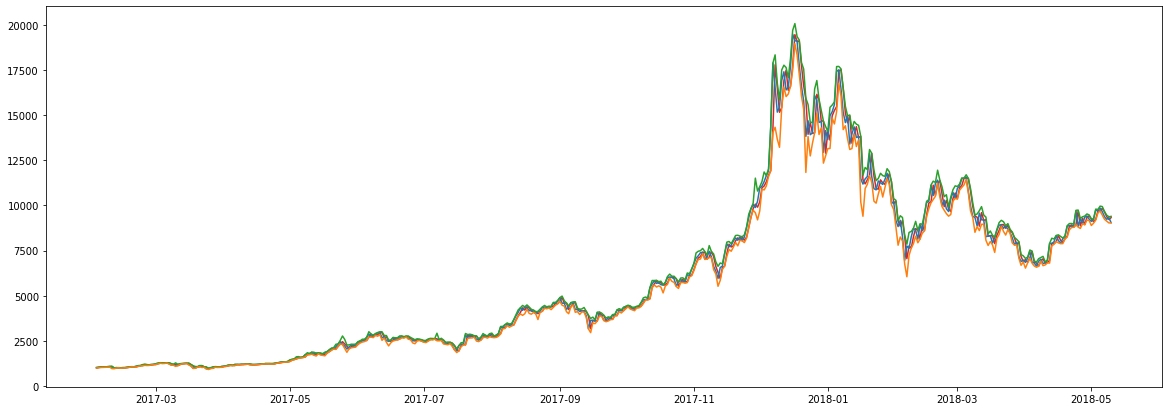

In [ ]:
start_date = '2017-02-01'
end_date = '2018-05-10'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df_selected = df.loc[mask]
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df_selected["Date"], df_selected["Open"],color='tab:red')
ax.plot(df_selected["Date"], df_selected["Close"],color='tab:blue')
ax.plot(df_selected["Date"], df_selected["High"], color='tab:green')
ax.plot(df_selected["Date"], df_selected["Low"],color='tab:orange')


We want to group the open prices, so we defined intervals for open price using the numpy library. We assign each value in the 'Open' column to appropriate price interval to see the grouping of the prices

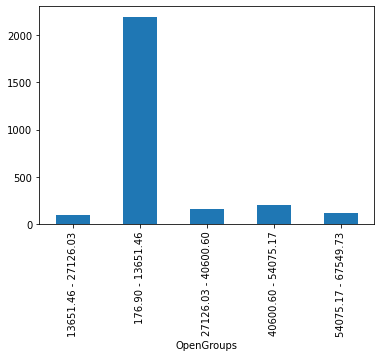

In [ ]:
min = df["Open"].min()
max = df["Open"].max()
open_clusters = np.linspace(min,max,6)
def assign_cluster(price):
    txt = "{:.2f} - {:.2f}"
    
    if price <= open_clusters[1]:
        return txt.format(open_clusters[0],open_clusters[1])
    elif price <= open_clusters[2]:
        return txt.format(open_clusters[1],open_clusters[2])
    elif price <= open_clusters[3]:
        return txt.format(open_clusters[2],open_clusters[3])
    elif price <= open_clusters[4]:
        return txt.format(open_clusters[3],open_clusters[4])
    elif price <= open_clusters[5]:
        return txt.format(open_clusters[4],open_clusters[5])
  


df["OpenGroups"] = df["Open"].apply(assign_cluster)
df.groupby(by="OpenGroups").size().plot(kind = "bar")


To describe the statistical values, it would be a good idea to use boxplots for the variables of dataset. Below there are some Box-plots that are showing the statistical values, mean, IQL, and outliers. When we detailly look at the box plots, we can see that there is a lot of outliers exist. 

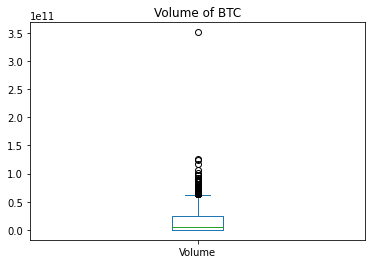

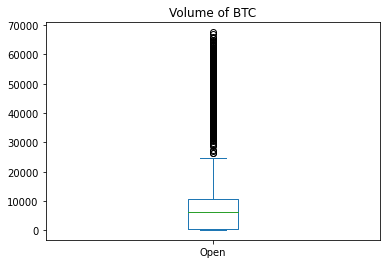

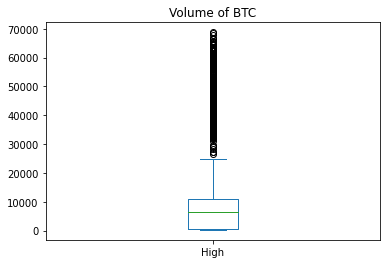

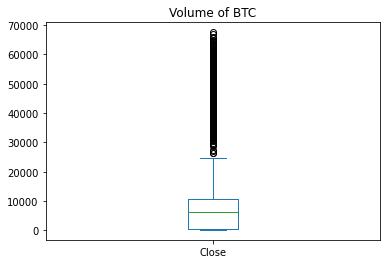

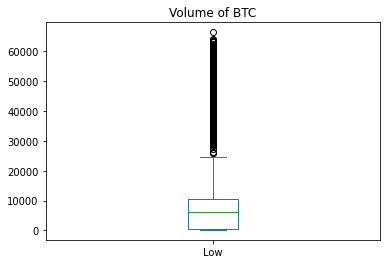

In [ ]:
df['Volume'].plot(kind='box', title='Volume of BTC')
plt.show()
df['Open'].plot(kind='box', title='Volume of BTC')
plt.show()
df['High'].plot(kind='box', title='Volume of BTC')
plt.show()
df['Close'].plot(kind='box', title='Volume of BTC')
plt.show()
df['Low'].plot(kind='box', title='Volume of BTC')
plt.show()

Again, below boxplots indicate the statistical values and the comparison of each of them with respect to each other. The outlier points shown more detailly on graphs. 

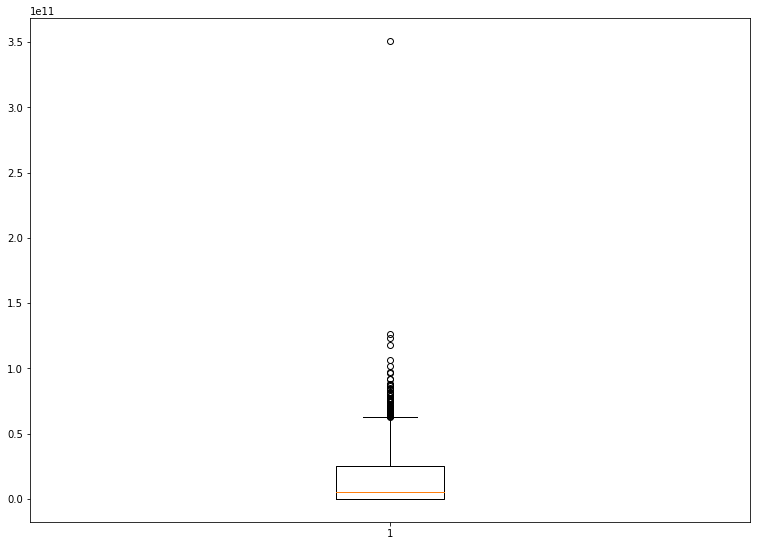

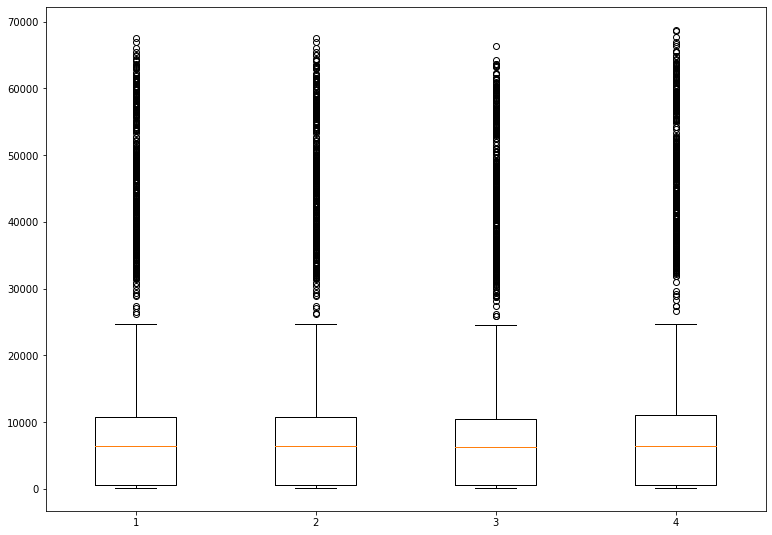

In [ ]:
data = [df['Volume']]
data2 = [df['Open'], df['Close'], df['Low'],df['High']]

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data)

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data2)

###New Features



##Bitcoin - Ethereum Comparison


Again we use same exploration steps for Ethereum and try to compare it with Bitcoin data. Since ethereums volume is related to bitcoin (because ethereum is one of the alternative coins), it would be a better idea to examine some movements of Ethereum. 

###Data Features of Ethereum

In [ ]:
fEthereum = "coin_Ethereum.csv"
df_Ethereum = pd.read_csv(join(path_prefix, fEthereum))
df_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


We can see that there is no missing value in ethereum data as well. 

###Missing values

In [ ]:
df_Ethereum.isna().sum() #no missing value

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Again statistical values of Ethereum data.

###Statistical values

In [ ]:
df_Ethereum.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


###Correlation

In [ ]:
corr = df_Ethereum.corr()
corr

,SNo,High,Low,Open,Close,Volume,Marketcap
SNo,1.000000,0.557207,0.564543,0.560077,0.560917,0.752004,0.568446
High,0.557207,1.000000,0.997070,0.998863,0.998457,0.775234,0.996788
Low,0.564543,0.997070,1.000000,0.997049,0.998552,0.761179,0.996887
Open,0.560077,0.998863,0.997049,1.000000,0.996722,0.771592,0.995078
Close,0.560917,0.998457,0.998552,0.996722,1.000000,0.769200,0.998351
Volume,0.752004,0.775234,0.761179,0.771592,0.769200,1.000000,0.785412
Marketcap,0.568446,0.996788,0.996887,0.995078,0.998351,0.785412,1.000000


A heat map shows the proportions of the correlation of different variables, we can see that the correlation is different than the Bitcoin but still, we can some strong correlation between high, low, open and close prices. However, the correlation between the volume and other variables is seemed to be less compared to the Bitcoin data. It can be also seen on the above table. 

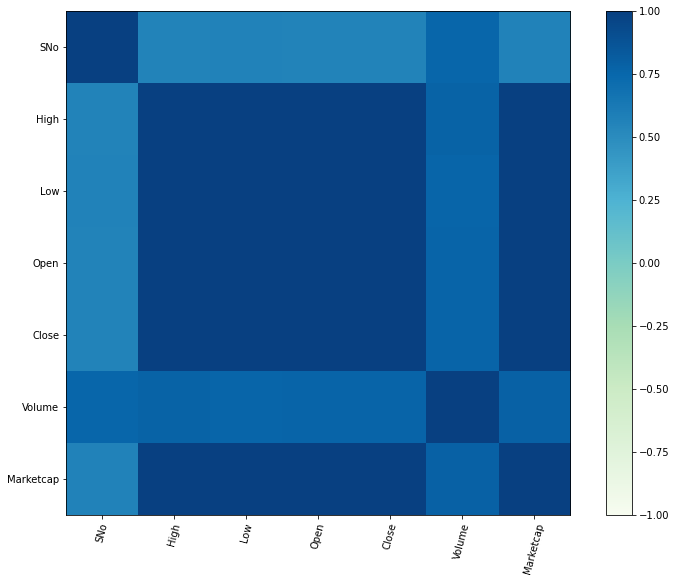

In [ ]:
fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

plt.imshow(corr, cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=75)
plt.yticks(range(len(corr)),corr.index)
plt.show()

###Visualisation of the analysis of the relationship of Ethereum & Bitcoin

Below figure is the indication of how ethereum data behave simultaneously with the Bitcoin. We observe similar fluctuations with bitcoin when we look at the Ethereum. However, other variables does not show such similar behavior compared to the volumes. Last graph just show the market capitalization of ethereum in time, and it also resembles to the movement of Bitcoin.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0.5, 'MarketCap of Ethereum'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'MarketCap Over Time')]

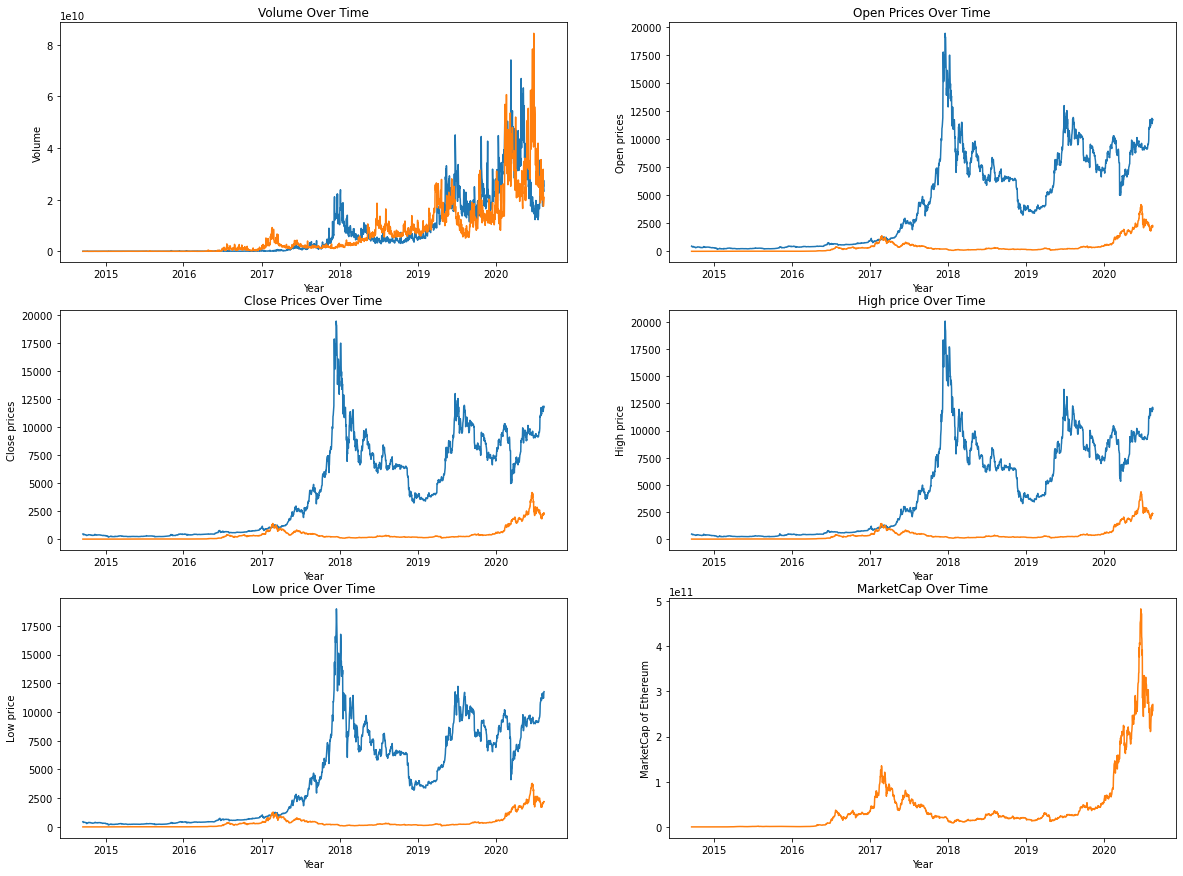

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(20,15))

df_copy = df.iloc[:2160]

df_copy['Date'] =  pd.to_datetime(df["Date"])
df_Ethereum['Date'] =  pd.to_datetime(df["Date"])

ax[0][0].plot(df_copy['Date'], df_copy['Volume'], color = 'tab:blue')
ax[0][0].plot(df_Ethereum['Date'], df_Ethereum['Volume'], color = 'tab:orange')
ax[0][0].set(xlabel="Year",
       ylabel="Volume",
       title="Volume Over Time")

ax[0][1].plot(df_copy['Date'], df_copy['Open'], color = 'tab:blue')
ax[0][1].plot(df_Ethereum['Date'], df_Ethereum['Open'], color = 'tab:orange')
ax[0][1].set(xlabel="Year",
       ylabel="Open prices",
       title="Open Prices Over Time")

ax[1][0].plot(df_copy['Date'], df_copy['Close'], color = 'tab:blue')
ax[1][0].plot(df_Ethereum['Date'], df_Ethereum['Close'], color = 'tab:orange')
ax[1][0].set(xlabel="Year",
       ylabel="Close prices",
       title="Close Prices Over Time")

ax[1][1].plot(df_copy['Date'], df_copy['High'], color = 'tab:blue')
ax[1][1].plot(df_Ethereum['Date'], df_Ethereum['High'], color = 'tab:orange')
ax[1][1].set(xlabel="Year",
       ylabel="High price",
       title="High price Over Time")

ax[2][0].plot(df_copy['Date'], df_copy['Low'], color = 'tab:blue')
ax[2][0].plot(df_Ethereum['Date'], df_Ethereum['Low'], color = 'tab:orange')
ax[2][0].set(xlabel="Year",
       ylabel="Low price",
       title="Low price Over Time")

ax[2][1].plot(df_Ethereum['Date'], df_Ethereum['Marketcap'], color = 'tab:orange')
ax[2][1].set(xlabel="Year",
       ylabel="MarketCap of Ethereum",
       title="MarketCap Over Time")

Below boxplots indicate the statistical behavior of both volume of the Bitcoin and the volume of the ethereum. Compared to bitcoin, we can see a more broad range outliers exist in the ethereum box-plot. However the medians are on similar range.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



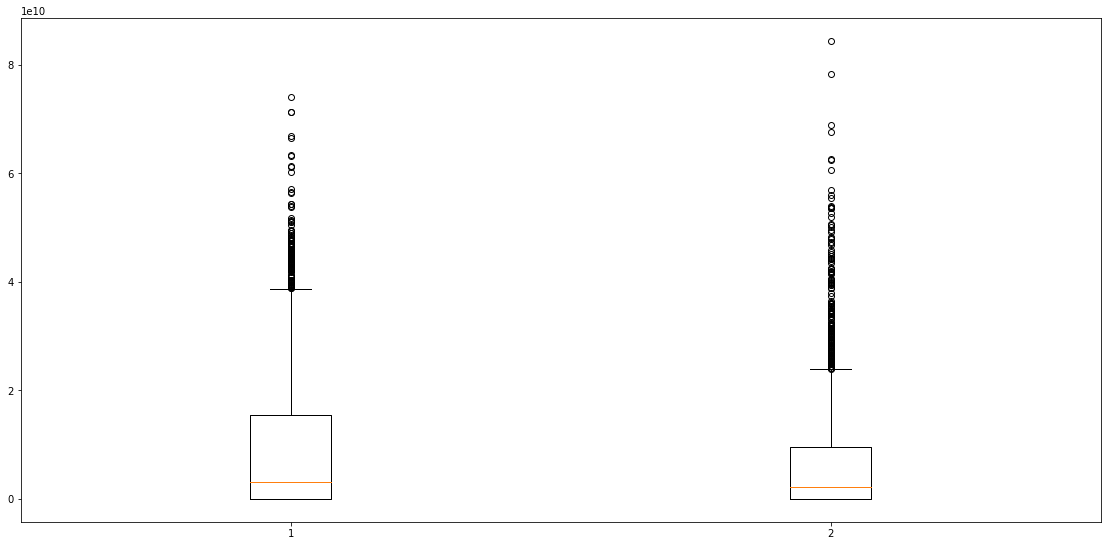

In [ ]:
df_copy = df[df['Date'].dt.year < 2021]
data = [df_copy['Volume'], df_Ethereum['Volume']]

fig = plt.figure(figsize =(15, 7))

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data)

with iloc we get same number of data points with bitcoin and ethereum from main dataframe to use same range on scatterplot.

In [ ]:
df_copy = df_copy.iloc[:2160]
df_copy

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46
...,...,...,...,...,...,...,...,...,...
2155,2020-08-11,11881.647461,11932.710938,11195.708984,11410.525391,11410.525391,27039782640,737.001954,176.90 - 13651.46
2156,2020-08-12,11404.596680,11748.396484,11249.605469,11584.934570,11584.934570,25064548486,498.791015,176.90 - 13651.46
2157,2020-08-13,11588.405273,11796.396484,11216.872070,11784.137695,11784.137695,27522199497,579.524414,176.90 - 13651.46
2158,2020-08-14,11772.659180,12150.994141,11685.455078,11768.871094,11768.871094,24237958589,465.539063,176.90 - 13651.46


A clear scatterplot shows that at the beginning ethereum and bitcoin behaves similarly compared to the later phases. We can see a more clear trendline gives the correlation between ethereum volume and bitcoin volume. 

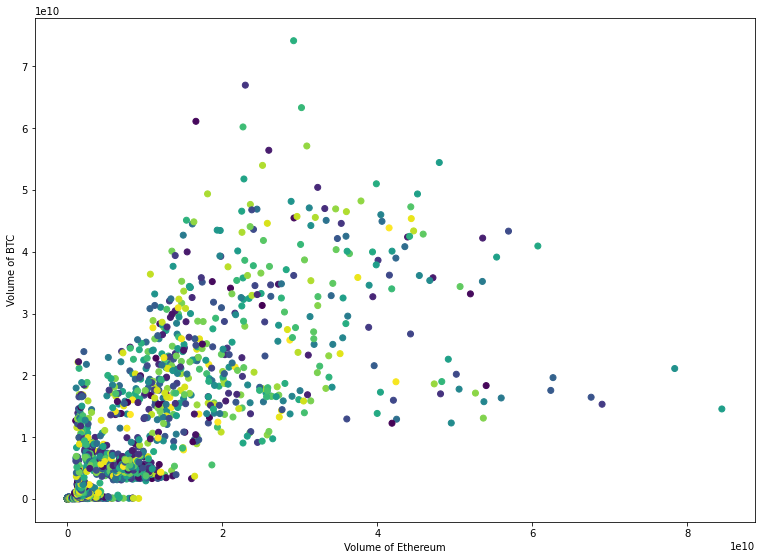

In [ ]:
data = {
    "a": df_Ethereum["Volume"],
    "b": df_copy['Volume'],
    "c": np.random.randint(0, 2160, 2160),
}

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

plt.scatter( data["a"], data["b"], c=data["c"])
plt.xlabel("Volume of Ethereum")
plt.ylabel("Volume of BTC")
plt.show()

More weird behavior can be observed on the price range (high - low) scatter-plot of ethereum and Bitcoin. This can be useful in the machine learning stage because there is an obvious cluster exist at the lower left part. It can result in an examination of useful data cluster in further stages.

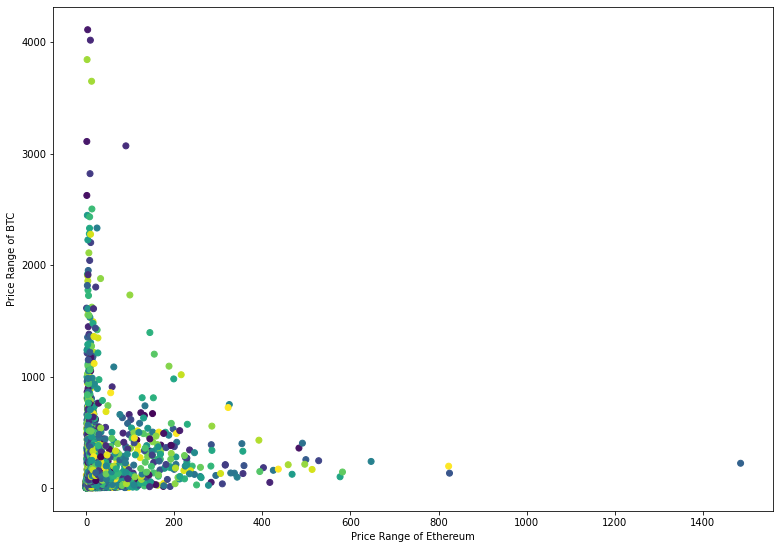

In [ ]:
df_Ethereum['Price Range'] = df_Ethereum['High'] - df_Ethereum['Low']
df_copy['Price Range'] = df_copy['High'] - df_copy['Low']


data = {
    "a": df_Ethereum["Price Range"],
    "b": df_copy['Price Range'],
    "c": np.random.randint(0, 2160, 2160),
}

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

plt.scatter( data["a"], data["b"], c=data["c"])
plt.xlabel("Price Range of Ethereum")
plt.ylabel("Price Range of BTC")
plt.show()

We use same exploration steps for Aave and try to compare it with Bitcoin data.

##Bitcoin - Aave Comparison

###Data Features of Aave

In [ ]:
fAave = "coin_Aave.csv"
df_a = pd.read_csv(join(path_prefix, fAave))
df_a.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


Basic properties

###Statistical values

In [ ]:
df_a.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


There is not even 1 NaN value.

###Missing values

In [ ]:
df_a.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

###Correlation

In [ ]:
corr = df_a.corr()
corr

,SNo,High,Low,Open,Close,Volume,Marketcap
SNo,1.000000,0.744159,0.735676,0.746203,0.742790,0.349547,0.760847
High,0.744159,1.000000,0.986692,0.993092,0.993260,0.662403,0.993034
Low,0.735676,0.986692,1.000000,0.987773,0.993655,0.568600,0.992230
Open,0.746203,0.993092,0.987773,1.000000,0.986409,0.602500,0.985926
Close,0.742790,0.993260,0.993655,0.986409,1.000000,0.619731,0.999130
Volume,0.349547,0.662403,0.568600,0.602500,0.619731,1.000000,0.620913
Marketcap,0.760847,0.993034,0.992230,0.985926,0.999130,0.620913,1.000000


###Visualisation of the analysis of the relationship of Aave & Bitcoin

Below figure is the indication of how Aave data behave simultaneously with the Bitcoin. We observe kind of different fluctuations with bitcoin when we look at the Aave data. Last graph just show the market capitalization of Aave in time, and it also resembles to the movement of Bitcoin.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0.5, 'MarketCap of Aave'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'MarketCap Over Time')]

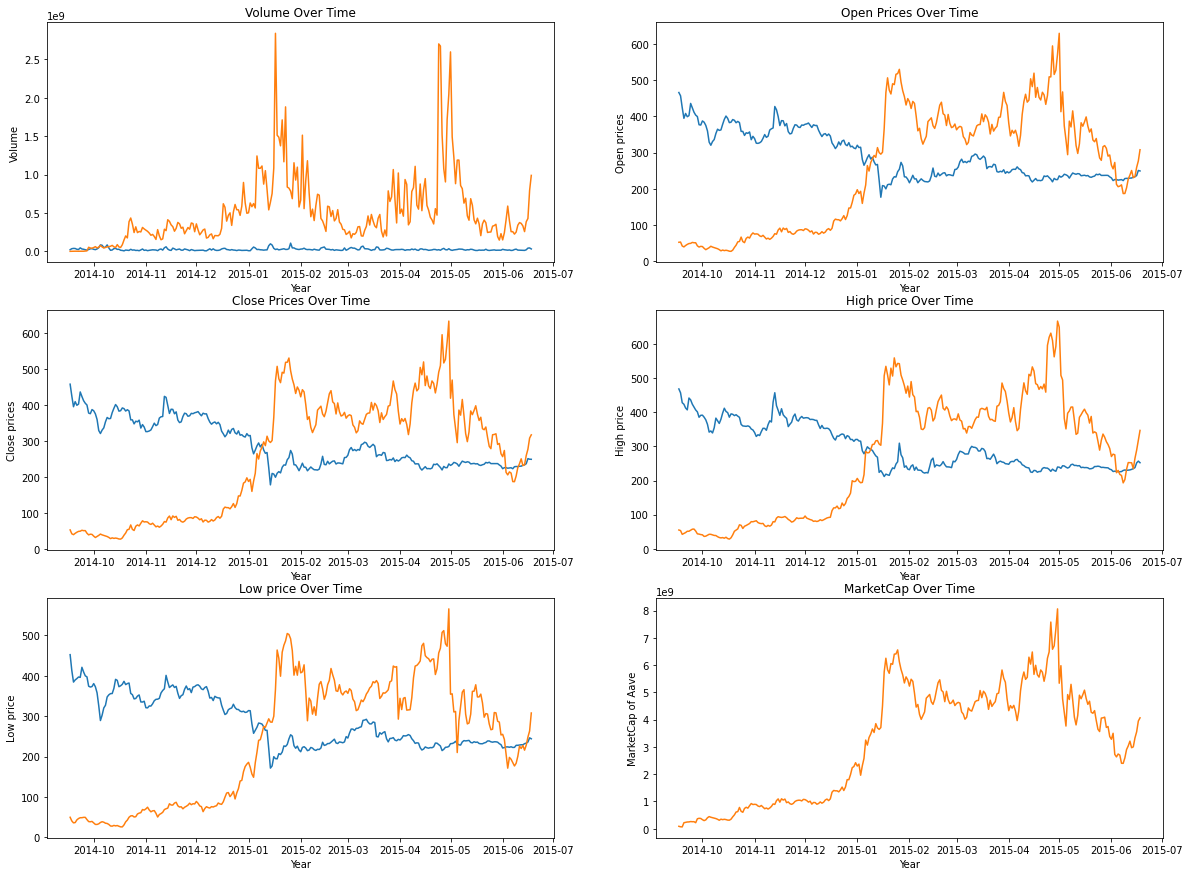

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(20,15))

df_copy = df.iloc[:275]

df_copy['Date'] =  pd.to_datetime(df["Date"])
df_a['Date'] =  pd.to_datetime(df["Date"])

ax[0][0].plot(df_copy['Date'], df_copy['Volume'], color = 'tab:blue')
ax[0][0].plot(df_a['Date'], df_a['Volume'], color = 'tab:orange')
ax[0][0].set(xlabel="Year",
       ylabel="Volume",
       title="Volume Over Time")

ax[0][1].plot(df_copy['Date'], df_copy['Open'], color = 'tab:blue')
ax[0][1].plot(df_a['Date'], df_a['Open'], color = 'tab:orange')
ax[0][1].set(xlabel="Year",
       ylabel="Open prices",
       title="Open Prices Over Time")

ax[1][0].plot(df_copy['Date'], df_copy['Close'], color = 'tab:blue')
ax[1][0].plot(df_a['Date'], df_a['Close'], color = 'tab:orange')
ax[1][0].set(xlabel="Year",
       ylabel="Close prices",
       title="Close Prices Over Time")

ax[1][1].plot(df_copy['Date'], df_copy['High'], color = 'tab:blue')
ax[1][1].plot(df_a['Date'], df_a['High'], color = 'tab:orange')
ax[1][1].set(xlabel="Year",
       ylabel="High price",
       title="High price Over Time")

ax[2][0].plot(df_copy['Date'], df_copy['Low'], color = 'tab:blue')
ax[2][0].plot(df_a['Date'], df_a['Low'], color = 'tab:orange')
ax[2][0].set(xlabel="Year",
       ylabel="Low price",
       title="Low price Over Time")

ax[2][1].plot(df_a['Date'], df_a['Marketcap'], color = 'tab:orange')
ax[2][1].set(xlabel="Year",
       ylabel="MarketCap of Aave",
       title="MarketCap Over Time")

Here we use scatter plot to see the relationship in terms of volumes.

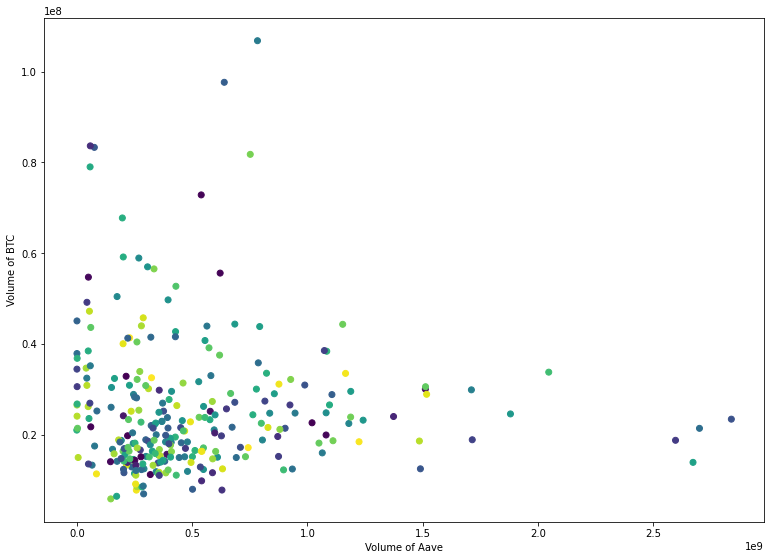

In [ ]:
df_copy = df.iloc[:275]

data = {
    "a": df_a["Volume"],
    "b": df_copy['Volume'],
    "c": np.random.randint(0, 275, 275),
}

fig = plt.figure(figsize =(10, 7))

ax = fig.add_axes([0, 0, 1, 1])

plt.scatter( data["a"], data["b"], c=data["c"])
plt.xlabel("Volume of Aave")
plt.ylabel("Volume of BTC")
plt.show()

## Correlation between Number of tweets with #Bitcoin and volume of Bitcoin per day\

In [ ]:
dfTweet = pd.read_excel(join(path_prefix, "bitcoinnn.xlsx"))
dfvolume = pd.read_csv(join(path_prefix, "BTC-USD.csv"))

dfTweet = dfTweet.dropna(how="any") 
dfvolume = dfvolume.dropna(how="any")


dfTweet = dfTweet.tail(110)

We filtered our data from NA values.

In [ ]:
dfvolume = dfvolume.tail(92)
dfvolume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 2663 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       92 non-null     object 
 1   Open       92 non-null     float64
 2   High       92 non-null     float64
 3   Low        92 non-null     float64
 4   Close      92 non-null     float64
 5   Adj Close  92 non-null     float64
 6   Volume     92 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.8+ KB


Here, we considered last 92 days for our graph. 


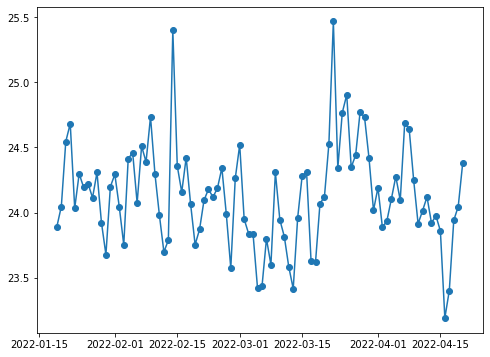

In [ ]:
# Plot a simple line chart
dates = list(dfTweet.iloc[:,0])
dates=dates[-92:]
tweets = 2*np.log(list(dfTweet.iloc[:,1]))
tweets = tweets[-92:]
plt.figure(figsize=(8,6))

# Plot
plt.plot(dates, tweets, marker='o')

# Display
plt.show()

This graph shows number of the tweets with #Bitcoin in the last 92 days. We took logarithm of the number of the tweets to elaborate data more. And we multiply with 2 to have close numbers with logarithm of bitcoin volume. We used logarithm because logarithm is an ascending function that it will not affect comparisons. a < b => log(a) < log(b)

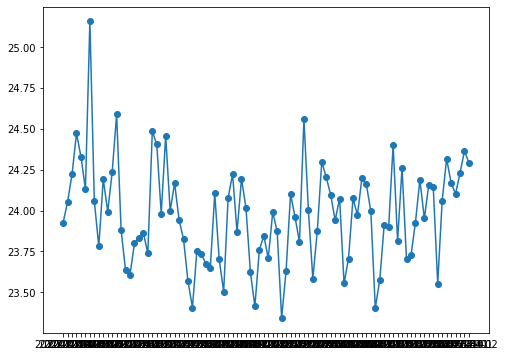

In [ ]:
dates1 = list(dfvolume.iloc[:,0])
dates1=dates1[-92:]
volume = np.log(list(dfvolume.iloc[:,6]))
volume = volume[-92:]
plt.figure(figsize=(8,6))

# Plot
plt.plot(dates1, volume, marker='o')
plt.show()

This graph shows volume of bitcoin per day. Again, we took logarithm to elaborate our data more.


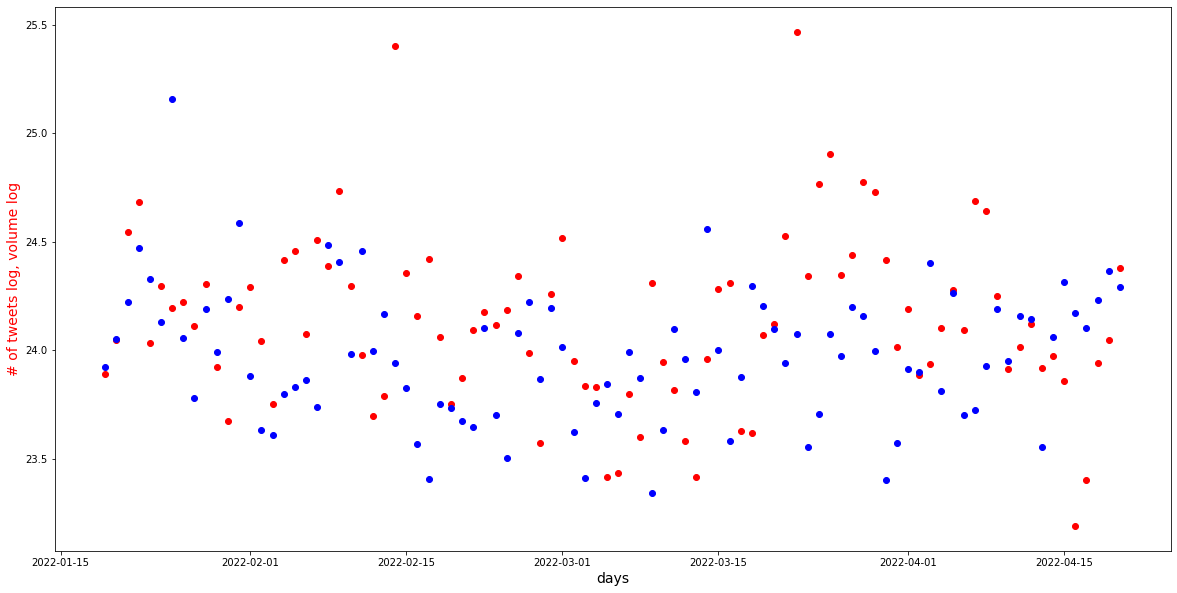

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))

# make a plot
ax.scatter(dates, tweets, color='red')

# set x-axis label
ax.set_xlabel("days",fontsize=14)

# set y-axis label
ax.set_ylabel("# of tweets log, volume log",color="red",fontsize=14)


# make a plot with different y-axis using second axis object
ax.scatter(dates, volume, color = 'blue')

plt.show()

# save the plot as a file
fig.savefig('bitcoinTweet.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Here, there is a scatter plot that shows correlation between number of tweets with #Bitcoin and volume of Bitcoin. We see that there is neither a strong correlation nor weak correlation. We assume that number of tweets with #Bitcoin per day have a positive correlation with volume of bitcoin. However, at the end of the analysis of the data, we concluded that there is not a correlation between them.

**Future Work**

---



The foundings of this step will be used in other steps of the projects such as statictical modelling, hypothesis testing and machine learning. Firstly, we will try to identfy global political,economic or social events that are potential affectors of the behaviour of bitcoin. We will especially focus on the time intervals(years) we selected and investigate how the events affect major peaks, increases or decreases of the coin. Secondly, we will try to identify patterns, correlations, trends,seasonality by using statistical techniques and tools to fit the data and use it to create predictive models. Finally, we will construct a machine learning algortihm to predict the behaviour of coin, opening and closing prices etc. 

##Hypothesis Testing

###Hypothesis test for the impact of volume and closing price on the opening price of next day

In [ ]:
df.count()

Date          2755
Open          2755
High          2755
Low           2755
Close         2755
Adj Close     2755
Volume        2755
PriceRange    2755
OpenGroups    2755
dtype: int64

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46


The statistical test reports a strong positive correlation with a value of 0.9. The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely (e.g. 95% confidence) and that we can reject the null hypothesis that the samples are uncorrelated

At this step of our project, we wanted to test that if closing price of previous day affects open price of next day. We constructed our null and alternative hypothesis as follows: 
Null hypothesis(H0) -> There is no correlation or relation between closing price of previous day opening price of the next day.
Alternative Hypothesis(HA): There is a correlation or relation between closing price of previous day opening price of the next day.

We used Spearman's Rank Correlation test as our both data variables are continuous values.

In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df['Close'].iloc[:2754]
data2 = df['Open'].iloc[1:]

stat, p = spearmanr(data1, data2)

print("Correlation coefficient ", stat)
if p > 0.05:
	print('Probably independent, fail to reject null hypothesis')
else:
	print('Probably dependent, reject null hypothesis')

Correlation coefficient  0.999996581011103
Probably dependent, reject null hypothesis


After our test, we could see that opening and closing variables are probably dependent and correlation coefficient is 0.99999658. 
Since p-val is smaller than our significance level( a= 0.05), we reject null hypothesis in favor of alternative such that there is a correlation or relation between closing price of previous day opening price of the next day.



We decided to apply Spearman's Rank Correlation for volume and open features, too.
Null hypothesis(H0) -> There is no correlation or relation between volume of previous day opening price of the next day.
Alternative Hypothesis(HA): There is a correlation or relation between volume of previous day opening price of the next day.

In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df['Volume'].iloc[:2754]
data2 = df['Open'].iloc[1:]

stat, p = spearmanr(data1, data2)

print("Correlation coefficient ", stat)
if p > 0.05:
	print('Probably independent, fail to reject null hypothesis')
else:
	print('Probably dependent, reject null hypothesis')

Correlation coefficient  0.9280256627614606
Probably dependent, reject null hypothesis


In [ ]:
openingPrices = df['Open']
highPrices = df['Low']

stat, p = spearmanr(openingPrices, highPrices)

print(stat, "{:.50f}".format(p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

0.9994332953361603 0.00000000000000000000000000000000000000000000000000
Probably dependent


In [ ]:
openingPrices = df['Open']
highPrices = df['High']

stat, p = spearmanr(openingPrices, highPrices)

print(stat, "{:.50f}".format(p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

0.9995725940499178 0.00000000000000000000000000000000000000000000000000
Probably dependent


In [ ]:
openingPrices = df['Open']
highPrices = df['PriceRange']

stat, p = spearmanr(openingPrices, highPrices)

print(stat, "{:.50f}".format(p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

0.9162988504223195 0.00000000000000000000000000000000000000000000000000
Probably dependent


Since p-val is smaller than our significance level( a= 0.05), we reject null hypothesis in favor of alternative such that there is a correlation or relation between volume of previous day opening price of the next day.

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46


At the next section below, we determined several time intervals to see whether the prices differ for different time intervals. 
<br>
We firstly selected May 2021 and July 2021.
Null hypothesis: There is no diffence between open prices of May 2021 and July 2021.
Alternative hypothesis:  There is a diffence between open prices of May 2021 and July 2021.

Since we have two samples with numerical values, we chose to apply two sample t-test

In [ ]:
thirdMonth = (df['Date'] > '2021-03-01') & (df['Date'] <= '2021-03-30')
third_df = df.loc[thirdMonth]

seventhMonth = (df['Date'] > '2021-07-01') & (df['Date'] <= '2021-07-30')
seventh_df = df.loc[seventhMonth]


stat , pval = stats.ttest_ind(third_df['Open'], seventh_df['Open'], equal_var=False)

print("p-val", pval);
if pval < 0.05 :
   print("reject null hypothesis")
else:
   print("fail to reject null hypothesis")



p-val 8.962935097439427e-30
reject null hypothesis


Since p-val is smaller than 0.05, we reject the null hypothesis, there is a difference between the prices of May 2021 and June 2021

Also, we wanted to examine different years with respect to open prices. 

We constructed our hypothesis as follows:
Null hypothesis: There is no diffence between open prices of 2021 and July 2022.
Alternative hypothesis: There is a diffence between open prices of 2021 and July 2022.


In [ ]:
year2021 = (df['Date'] > '2021-01-01') & (df['Date'] <= '2021-12-31')
year2021_df = df.loc[year2021]

year2022 = (df['Date'] > '2022-01-01') & (df['Date'] <= '2022-12-31')
year2022_df = df.loc[year2022]


stat , pval = stats.ttest_ind(year2022_df['Open'], year2021_df['Open'], equal_var=False)


print("p-val", pval);
if pval < 0.05 :
   print("reject null hypothesis", "p-value" , pval)
else:
   print("fail to reject null hypothesis")

p-val 1.4135597725702083e-21
reject null hypothesis p-value 1.4135597725702083e-21


Since p-val is smaller than 0.05, we reject the null hypothesis, there is a difference between years 2021 and 2022.



We again wanted to see if there is a difference between 2015 and 2021 since we know that prices of Bitcoin escalated throughout years.  

In [ ]:
year2021 = (df['Date'] > '2021-01-01') & (df['Date'] <= '2021-12-31')
year2021_df = df.loc[year2021]

year2017 = (df['Date'] > '2015-01-01') & (df['Date'] <= '2015-12-31')
year2017_df = df.loc[year2017]


stat , pval = stats.ttest_ind(year2021_df['Open'], year2017_df['Open'], equal_var=False)

print("p-val", pval);
if pval < 0.05 :
   print("reject null hypothesis", "p-value" , pval)
else:
   print("fail to reject null hypothesis")

p-val 2.6727614987225552e-253
reject null hypothesis p-value 2.6727614987225552e-253


Since p-val is smaller than 0.05, we reject the null hypothesis, there is a difference between years 2021 and 2015.

In addition, p value(2.6727614987225552e-253) is much smaller than the p-value(1.4135597725702083e-21) we found for the difference between years 2021 and 2022. 

This indicates that we have much stronger evidence for the difference between 2015 and 2021 than 2021 and 2022




Lastly, as we mentioned at the beginning of our report, we saw a pattern(maybe seasonality) the behaviour of the data. We just wanted to see if there is a similarity between questioned time intervals. 

In [ ]:
year2021 = (df['Date'] > '2021-01-01') & (df['Date'] <= '2021-06-30')
year2021_df = df.loc[year2021]

year2022 = (df['Date'] > '2021-06-30') & (df['Date'] <= '2022-01-30')
year2022_df = df.loc[year2022]


stat , pval = stats.ttest_ind(year2022_df['Open'], year2021_df['Open'], equal_var=False)

print("p-val", pval);
if pval < 0.05 :
   print("reject null hypothesis")
else:
   print("fail to reject null hypothesis")

p-val 0.05491354500711753
fail to reject null hypothesis


Here, p-value turned out to be bigger than significance level. So we are fail to reject the null hypothesis which states that there is no difference of opening prices between the time periods Jan 2021 - June 2021 and June 2021 - Jan 2022

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46


In [ ]:
df["Daily Change"] = round(((df["Close"] - df["Open"]) / df["Open"] * 100),3)

openingPrices =  df['Open']
dailyChange = df['Daily Change']

stat, p = spearmanr(openingPrices, highPrices)

print(stat, "{:.50f}".format(p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

df.head()

0.9162988504223195 0.00000000000000000000000000000000000000000000000000
Probably dependent


,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups,Daily Change
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46,-1.831
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46,-7.096
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46,-6.910
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46,3.606
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46,-2.270


In [ ]:
def downOrUp(dailyChange):
    
    if dailyChange == 0:
      return "No Change"   
    elif dailyChange < 0:
      return "Down"
    elif dailyChange > 0 :
      return "Up"
    

df["State"] = df["Daily Change"].apply(downOrUp)


In May 2021, ETH broke past all its previous records to set a new all-time high upwards of $4,000. This was the first time Ethereum had crossed even the $3,000 mark in the coin’s history. As of May 3rd, when the Ethereum price stood still at $3,110, several cryptocurrency analysts predicted that Ethereum would continue rising. And it did, until the $4,000 mark. (taken from https://www.moneycontrol.com/msite/wazirx-cryptocontrol-articles/ethereum-set-to-soar/)

So, we wanted to see if rise of ethereum had any impact on bitcoin prices and volume.

Our null hypothesis is that ethereum has no affect on bitcoin data
Our alternative hypothesis is that ethereum has an affact on bitcoin data

In [ ]:
afterEthereumRise= (df['Date'] > '2021-05-01') & (df['Date'] <= '2022-05-01')
beforeEthereumRise = (df['Date'] > '2020-05-01') & (df['Date'] <= '2021-05-01')
after_df = df.loc[afterEthereumRise]
before_df = df.loc[beforeEthereumRise]

stat , pval = stats.ttest_ind(before_df['Volume'], after_df['Volume'], equal_var=False)

stat1 , pval1 = stats.ttest_ind(before_df['Open'], after_df['Open'], equal_var=False)
if pval < 0.05 :
   print("reject null hypothesis", "p-value" , pval)
else:
   print("fail to reject null hypothesis")


if pval1 < 0.05 :
   print("reject null hypothesis", "p-value" , pval)
else:
   print("fail to reject null hypothesis")


reject null hypothesis p-value 7.856888259185664e-07
reject null hypothesis p-value 7.856888259185664e-07


By looking at the p-val, we accepted that Ethereum has an affect on Bitcoin

###Spearman rank correlation

We set the Null hypothesis as the closing price does not affect the openning price of next day and we try to see whether we can reject the null hypothesis or not. In this notion we are using t-test and try to extract p_values to see whether it is below or above the critical region.

In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = df['Close'].iloc[:2754]
data2 = df['Open'].iloc[1:]
print(data2)
print(data1)
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.20f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

1         456.859985
2         424.102997
3         394.673004
4         408.084991
5         399.100006
            ...     
2750    47100.437500
2751    47456.898438
2752    47062.148438
2753    45554.164063
2754    46168.101563
Name: Open, Length: 2754, dtype: float64
0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2749    47128.003906
2750    47465.730469
2751    47062.664063
2752    45538.675781
2753    46281.644531
Name: Close, Length: 2754, dtype: float64
stat=1.000, p=0.00000000000000000000
Probably dependent


In [ ]:
emptyList = list()

for i in range (1,2754):
    x = df.iloc[i]["Open"] - df.iloc[i-1]["Close"]
    if(x > 0):
      emptyList.append("Increase")
    else:
      emptyList.append("Decrease")

df_copy = df.iloc[1:2754]
df_copy["Change"] = emptyList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
decrease_val = df_copy[df_copy["Change"] == "Decrease"]['Open']
increase_val = df_copy[df_copy["Change"] == "Increase"]['Open']

decrease_val.count()

1365

In [ ]:
increase_val.count()

1388

In [ ]:
print(f"Mean of the decreasing values (Open price of next day - close price): {decrease_val.mean():.2f}")

Mean of the decreasing values (Open price of next day - close price): 12577.75


In [ ]:
print(f"Mean of the increasing values (Open price of next day - close price): {increase_val.mean():.2f}")

Mean of the increasing values (Open price of next day - close price): 10956.34


In [ ]:
import seaborn as sns

In this part we try to indicate the increasing values, decreasing values and the densities below the functions.

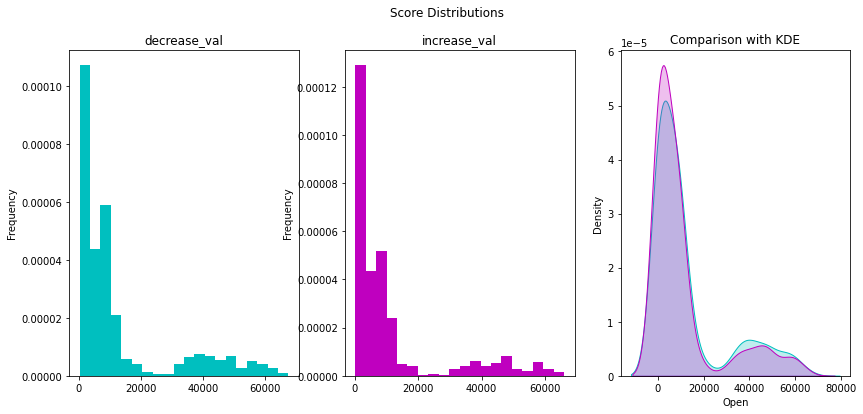

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
decrease_val.plot(kind="hist", ax=ax[0], bins=20, label="decrease_val", color="c", density=True)
ax[0].set_title("decrease_val")

increase_val.plot(kind="hist", ax=ax[1], bins=20, label="increase_val", color="m", density=True)
ax[1].set_title("increase_val")

sns.kdeplot(decrease_val, shade=True, label="decrease_val", ax=ax[2], color="c")
sns.kdeplot(increase_val, shade=True, label="increase_val", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Score Distributions")
plt.show()

In [ ]:
stat , pval = stats.ttest_ind(decrease_val, increase_val, equal_var=False)  # since we have not equal variances

In [ ]:
print("Statistical value: {} probability: {}".format(stat, pval))

Statistical value: 2.5957646786071433 probability: 0.009488482106504123


In [ ]:
if(pval <= 0.05):
  print("Rejected Null Hypothesis --> Closing price is affecting the opening price of next day")
else:
  print("Not reject Null Hypothesis --> Closing price is not affecting the opening price of next day")

Rejected Null Hypothesis --> Closing price is affecting the opening price of next day


###Sample mean comparison
######We are trying to select random samples which is less than 10% of the data to ensure that we can use standard normal distribution and extract the sample mean of both Bitcoin and Etherum data. The main reason behind this notion is to understand whether BTC data is affected by the movement of Ethereum. 

WE first extract the sample and generate random indeces to create random sample

In [ ]:
#Random num selector

import random

def randNumGenerator(start, end, number):
  emptyList = list()
  for i in range(number):
    x = random.randint(start, end)
    if(x not in emptyList):
      emptyList.append(x)
  return emptyList


number = 200
startBTC = 0
endBTC = 2754

randomBTCindeces = randNumGenerator(startBTC, endBTC, number)
print(randomBTCindeces)

startETH = 0
endETH = 2159

randomETHindeces = randNumGenerator(startETH, endETH, number)
print(randomETHindeces)

[1248, 415, 2527, 2742, 356, 297, 2488, 879, 2416, 2552, 2085, 121, 2327, 1535, 1762, 1986, 1925, 2323, 2700, 1078, 1719, 1070, 1756, 1400, 1576, 462, 181, 1496, 1402, 1751, 2043, 706, 921, 1541, 1067, 196, 2075, 2166, 1803, 1693, 374, 1802, 2154, 2424, 1725, 1893, 145, 1599, 1695, 1609, 721, 1637, 1399, 1597, 2426, 258, 582, 720, 1335, 982, 2387, 1771, 223, 1365, 914, 1493, 1992, 2495, 872, 1409, 1293, 207, 53, 1758, 708, 2002, 552, 2484, 832, 1866, 446, 1958, 1044, 1707, 2158, 2184, 66, 1362, 1510, 905, 1479, 2379, 346, 2210, 1963, 2518, 858, 920, 590, 262, 1905, 981, 320, 188, 1716, 867, 1877, 351, 917, 2097, 2616, 2585, 591, 1818, 1268, 785, 2161, 122, 2124, 2577, 2036, 1049, 461, 2229, 1117, 1453, 1579, 1983, 1587, 1734, 1430, 444, 740, 1452, 733, 1418, 1876, 1377, 2325, 1581, 1607, 21, 1972, 1473, 248, 966, 155, 1314, 213, 2262, 1853, 284, 842, 2320, 961, 1814, 2574, 862, 544, 1742, 1318, 2519, 773, 1232, 999, 951, 1705, 2717, 2522, 417, 2139, 705, 1864, 2673, 739, 1120, 778, 987

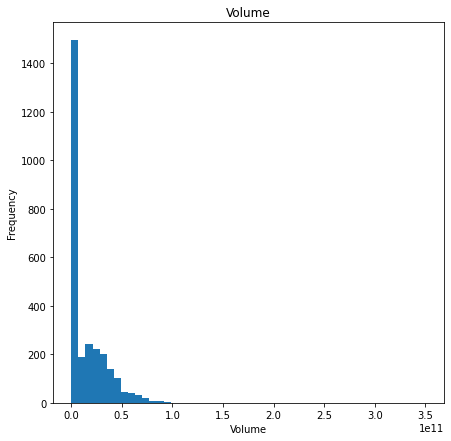

In [ ]:
ax = df['Volume'].plot.hist(bins = 50, figsize = (7,7))
ax.set_title('Volume')
ax.set_xlabel('Volume')
plt.show()

Extract random sample into a list with an efficient function

In [ ]:
def dataExtraction(feature):
  emptyBTCList = list()
  emptyETHList = list()
  for i in range(len(randomBTCindeces)):
    emptyBTCList.append(df[feature][randomBTCindeces[i]])
  #print(emptyBTCList)
  for i in range(len(randomETHindeces)):
    emptyETHList.append(df[feature][randomETHindeces[i]])
  #print(emptyETHList)
  return emptyBTCList, emptyETHList

In [ ]:
empBTCVol, empETHVol = dataExtraction('Volume')

In [ ]:
import math

print(empBTCVol)
print(empETHVol)

empBTCVolLog = list()
empETHVolLog = list()

for i in range(len(empBTCVol)):
  empBTCVolLog.append(math.log(empBTCVol[i]))

for i in range(len(empETHVol)):
  empETHVolLog.append(math.log(empETHVol[i]))

print(empBTCVolLog)
print(empETHVolLog)

[7296159744, 122687000, 32194123075, 24615543271, 26879200, 41109900, 22971873468, 67530000, 46088929780, 27881980161, 39137252109, 38421000, 65141828798, 6048016717, 25384047207, 45080496648, 21559505149, 60255421470, 28641855926, 1937849984, 20266216022, 3764239872, 28167921523, 6103410176, 6874143796, 47161400, 21497200, 3672860000, 4936869888, 25920294033, 32589741511, 85349200, 303668000, 5878333109, 2975820032, 22877200, 27727866812, 20224191306, 14153856610, 18026409033, 13724100, 15451030650, 26114112569, 68434023376, 16522722810, 21008924418, 27791300, 5071623601, 16784645411, 6480384532, 75032400, 9809887079, 5961950208, 5831198271, 65906690347, 20459000, 68204704, 78529104, 7364149760, 1763480064, 65520826225, 17398734322, 21469200, 5052349952, 406648000, 3578870000, 35349164300, 18895018942, 114208000, 5195879936, 4333440000, 12387900, 24205600, 28595327690, 136130000, 38682762605, 66813300, 26501259870, 167308000, 32593129501, 63455800, 28647338393, 789104000, 25127245056,

We get the means here

In [ ]:
def mean(sample):
  return sum(sample) / len(sample)


import math

# We relay on our previous implementation for the variance
def variance(data, ddof=0):
  n = len(data)
  mean = sum(data) / n
  return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

MeanBTC = mean(empBTCVol)
MeanETH = mean(empETHVol)

stdBTC = stdev(empBTCVol)
stdEth = stdev(empETHVol)

In [ ]:
print(MeanBTC)
print(MeanETH)

14012896188.512953
7263684494.861702


To see price changes we create a table column

In [ ]:
df['Price change'] = df['Close'] - df['Open']
df_Ethereum['Price change'] = df_Ethereum['Close'] - df_Ethereum['Open']

In [ ]:
empBTCPriceChange, empETHPriceChange = dataExtraction('Price change')

In [ ]:
print(empBTCPriceChange)
print(empETHPriceChange)

[98.20019599999978, -13.576995999999951, 114.4375, -168.13671899999463, 3.761002000000019, 8.234984999999995, -290.72265699999843, -4.338990000000081, -1302.980469000002, 856.640625, -633.1699219999991, -0.9730069999999955, -26.410156000005372, -271.8203120000003, 637.2509769999997, -271.40820299999905, -50.60009699999955, 211.23632799999905, 1433.503905999998, -5.060058000000026, 177.484375, 102.16992200000004, 289.48632800000087, 55.459960999999566, -355.4868160000001, 5.680999999999983, -5.089996000000042, 1.1103510000002643, -113.2700190000005, -757.28125, 0.5390620000007402, -3.356017999999949, -7.290038999999979, -232.97265599999992, 55.95019500000035, 3.0489960000000167, 24.224609000000783, 96.34765599999992, -22.219726999999693, 83.90234400000008, -0.7360079999999982, -247.68359299999975, 215.8544920000004, 942.4492190000019, -82.64697200000046, 101.63232400000015, -3.2790069999999787, 36.43481399999973, 192.21240300000045, 10.77661100000023, 3.9710079999999834, 5.3979490000001

In [ ]:
Mean_priceBTC = mean(empBTCPriceChange)
Mean_priceETH = mean(empETHPriceChange)

In [ ]:
print(Mean_priceBTC)
print(Mean_priceETH)

75.25847266321257
-1.7094241808510173


We normalized the list below and try to see normal variable conversions

In [ ]:
# python 3.x
import numpy as np
from sklearn import preprocessing
list = np.array(empBTCVol).reshape(-1,1)
print('Original List:',list)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 3))
normalizedlist=scaler.fit_transform(list)
print('Normalized List:',normalizedlist)

In [ ]:
# python 3.x
import numpy as np
from sklearn import preprocessing
list = np.array(empETHVol).reshape(-1,1)
print('Original List:',list)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 3))
normalizedlist=scaler.fit_transform(list)
print('Normalized List:',normalizedlist)

In [ ]:
Mean_Normalized_Vol_BTC = mean(normalizedlist)
print(Mean_Normalized_Vol_BTC[0])
Std_Normalized_Vol_BTC = stdev(normalizedlist)
print(Std_Normalized_Vol_BTC)

0.38093372089773936
0.63591967852


In [ ]:
Mean_Normalized_Vol_ETH = mean(normalizedlist)
print(Mean_Normalized_Vol_ETH[0])
Std_Normalized_Vol_ETH = stdev(normalizedlist)
print(Std_Normalized_Vol_ETH)

0.38093372089773936
0.63591967852


Here we use advanced statistics to extract z-scores

In [ ]:
import scipy

z_score_BTC = (Mean_Normalized_Vol_BTC[0] - 0) / Std_Normalized_Vol_BTC
z_score_ETH = (Mean_Normalized_Vol_ETH[0] - 0) / Std_Normalized_Vol_ETH

p_value_BTC = scipy.stats.norm.sf(abs(z_score_BTC)) #one-sided
print(p_value_BTC)

p_value_ETH = scipy.stats.norm.sf(abs(z_score_ETH)) #one-sided
print(p_value_ETH)

print(z_score_BTC, z_score_ETH)

0.27457709194867513
0.27457709194867513
0.5990280435798132 0.5990280435798132


We use statistical test method to see whether z_scores gives the correlation

In [ ]:
if(z_score_BTC > 0.05 and z_score_BTC > 0.05):
  print("According to statistical test both are bigger than min level of p_value so they are dependent")
else:
  print("Eth-BTC not dependent")

According to statistical test both are bigger than min level of p_value so they are dependent


## Statistical tests on selected features

In [ ]:
import scipy.stats as stats
import random
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
path_prefix = "./drive/My Drive/CS210-Project"

dfvolume = pd.read_csv(join(path_prefix, "BTC-USD.csv"))

meansh = list()
meansl = list()
meanso = list()
meansc = list()
for i in range (0,50):
    high = list()
    low = list()
    open = list()
    close = list()
    subset = dfvolume.sample(n=20)
    dfvolume.drop(labels=subset.index, axis = 0, inplace = True)
    for i in range(0,20):
        high.append(subset.iloc[i]["High"])
        low.append(subset.iloc[i]["Low"])
        open.append(subset.iloc[i]["Open"])
        close.append(subset.iloc[i]["Close"])
    high_points = np.array(high)
    low_points = np.array(low)
    open_points = np.array(open)
    close_points = np.array(close)
    meansh.append(high_points.mean())
    meansl.append(low_points.mean())
    meanso.append(open_points.mean())
    meansc.append(close_points.mean())
    

print("Means of samples of high prices: ", meansh)
print("Means of samples of low prices: ", meansl)
print("Means of samples of close prices: ", meansc)
print("Means of samples of open prices: ", meanso)

Means of samples of high prices:  [8755.187041399997, 18972.80749445, 14833.317096049996, 6055.090340549999, 16778.800344900003, 14846.652233899998, 8114.892716349999, 12392.211418249999, 20022.92400975, 11323.97637185, 18529.2640855, 12758.5375503, 16096.97005775, 17895.28046875, 6270.1262337, 9230.28155215, 15582.403263900002, 15086.329122849997, 14086.836437200001, 17808.02169815, 5840.58166805, 4386.88657855, 14706.0932678, 15825.212288050001, 13680.57875835, 16697.912569350003, 12288.669104, 10710.857444750001, 12440.8014755, 8992.02326205, 10271.15267575, 12984.3108438, 6020.3571473, 9096.056295, 7991.74471225, 11071.898847249999, 17624.636749349997, 12887.38151255, 10418.458702100002, 10494.95124805, 11110.43420485, 9330.78275675, 8828.870878599999, 8530.212534350001, 13577.8656243, 6785.021971249999, 11237.35940855, 7628.494386250002, 9702.957048749999, 10997.559602399999]
Means of samples of low prices:  [8289.450689000001, 17813.5930145, 14104.644995249997, 5864.97779325, 158

We create 50 samples of size 20 for open, low, close and open prices randomly. Then, we calculate all samples' means and than form a normal distribution. After that, we become to be able to apply t-test on samples. 

In [ ]:
# HIGH - OPEN


var_ho = np.var(meansh)/ np.var(meanso)
print(var_ho)

#perform two sample t-test with equal variances between high and open
stats.ttest_ind(a=meansh, b=meanso, equal_var=True)


1.052135122723285


Ttest_indResult(statistic=0.3948794393329732, pvalue=0.6937899972181953)

Alpha value is 0.05 and p value is 0.6937899972181953. Because it is larger than alpha value 0=5, we reject the null hypothesis.

In [ ]:
# HIGH - CLOSE


var_hc = np.var(meansh)/ np.var(meansc)
print(var_hc)

#perform two sample t-test with equal variances between high and close
stats.ttest_ind(a=meansh, b=meansc, equal_var=True)


1.0515020152082897


Ttest_indResult(statistic=0.3972368054260123, pvalue=0.6920566845463276)

Alpha value is 0.05 and p value is 0.6920566845463276. Because it is larger than alpha value 0.05, we reject the null hypothesis.

In [ ]:
# LOW - OPEN

var_lo = np.var(meansl)/ np.var(meanso)
print(var_lo)

#perform two sample t-test with equal variances between low and open
stats.ttest_ind(a=meansl, b=meanso, equal_var=True)


0.9261211774056199


Ttest_indResult(statistic=-0.4673011307973511, pvalue=0.6413218308066062)

Alpha value is 0.05 and p value is 0.6413218308066062. Because it is larger than alpha value 0.05, we reject the null hypothesis.


In [ ]:
# LOW - CLOSE

var_lc = np.var(meansl)/ np.var(meansc)
print(var_lc)

#perform two sample t-test with equal variances between low and close
stats.ttest_ind(a=meansl, b=meansc, equal_var=True)


0.925563897010214


Ttest_indResult(statistic=-0.4647350945119982, pvalue=0.6431520701786813)

Alpha value is 0.05 and p value is 0.6431520701786813. Because it is larger than alpha value 0.05, we reject the null hypothesis.

In [ ]:
# OPEN - CLOSE

var_oc = np.var(meanso)/ np.var(meansc)
print(var_oc)


#perform two sample t-test with equal variances between open and close
stats.ttest_ind(a=meanso, b=meansc, equal_var=True)


0.9993982640619805


Ttest_indResult(statistic=0.00244655072033334, pvalue=0.9980529102405173)

Alpha value is 0.05 and p value is 0.9980529102405173. Because it is larger than alpha value 0.05, we reject the null hypothesis.

In [ ]:
# HIGH - LOW

var_hl = np.var(meansh)/ np.var(meansl)
print(var_hl)

#perform two sample t-test with equal variances between high and low
stats.ttest_ind(a=meansh, b=meansl, equal_var=True)



1.1360663684105279


Ttest_indResult(statistic=0.8632876964951559, pvalue=0.3900871727829699)

Alpha value is 0.05 and p value is 0.3900871727829699. Because it is larger than alpha value 0.05, we reject the null hypothesis.

##MACHINE LEARNING

 We have continuous data, so we decided to use knn algortihm to predict open prices of Bitcoin. We divided our data into training and test data. After, we trained our model with train data, we test our model with our test data. Later, we compared predictions with test data and the actual data in order to calculate error

 We ploted an elbow graph to see our model performance with different k values(hyperparameter), as it can be seen in the graph the error rate is minimum when k is between 21-23. So we chose k as 23

###KNN

[[  465.864014]
 [  456.859985]
 [  424.102997]
 ...
 [43194.503906]
 [44357.617188]
 [43925.195313]]


Text(0.5, 1.0, 'ELBOW PLOT')

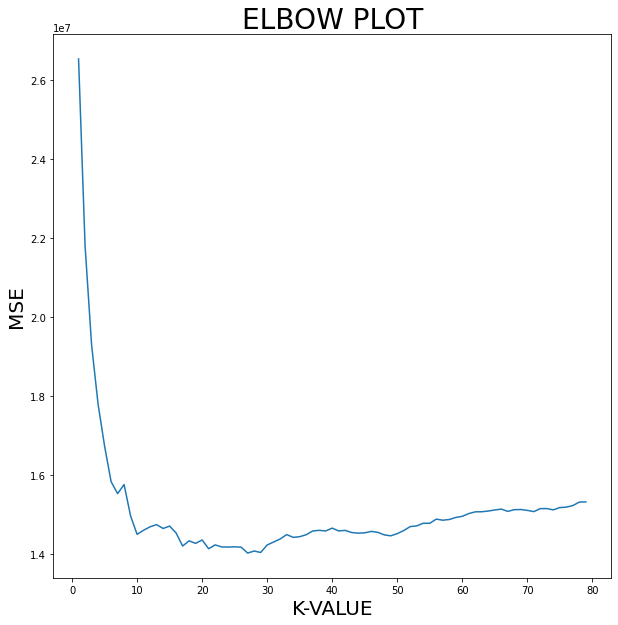

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = df[["Open"]].iloc[:-30].values
y = df["Open"].iloc[30:].values

print(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

fig,ax=plt.subplots(figsize=(10,10))
k_list=np.arange(1,80,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train,y_train)
    y_knn_pred=model_knn.predict(x_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results

ax.plot(np.array(list(knn_dict.keys())).astype(float),np.array(list(knn_dict.values())).astype(float))
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x = df[["Open"]].iloc[:-30].values
y = df["Open"].iloc[30:].values


x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)


knn=KNeighborsRegressor(n_neighbors=23)
model_knn=knn.fit(x_train,y_train)
y_knn_pred=model_knn.predict(x_test)
mse=mean_squared_error(y_test,y_knn_pred)

mse


13002765.996127808

We also trained our model with decision tree regressor since we have multiple continuous variables, and we want to predict the open price based on these parameters.

Again in order to choose best hyperparameters for our model, we used different max-depth s to see which one minimize our error rate

###Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error


features = ["Close", "Volume", "Low","High"]
X = df[features].values
Y = df["Open"].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)


max_depth = [5, 10, 20, 50,75, 100]

for depth in max_depth:
  dtc = DecisionTreeRegressor(max_depth=depth, random_state=42)

  dtc.fit(X_train, y_train)

  # Predict the labels of the test data
  y_test.reshape(-1, 1)
  y_pred = dtc.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  
  print("mse: {}".format(mse))
  print("mae: {}".format(mae))
  print("rmse: {}".format(rmse))


mse: 650025.9839779007
mae: 435.6203886168452
rmse: 806.2418892478241
mse: 420449.815551597
mae: 283.80541185815775
rmse: 648.4210172037895
mse: 437538.2471638893
mae: 282.28189315607983
rmse: 661.4667392725725
mse: 412784.76538171043
mae: 285.1185487640653
rmse: 642.4832802351439
mse: 412784.76538171043
mae: 285.1185487640653
rmse: 642.4832802351439
mse: 412784.76538171043
mae: 285.1185487640653
rmse: 642.4832802351439


At the code below, we displayed the trend, seasonality and noise in our time series data set

In [ ]:
import statsmodels.api as sm  

def decompose(series):
  res = sm.tsa.seasonal_decompose(series, model='additive',extrapolate_trend='freq', freq=24)

  observed = res.observed
  trend = res.trend
  seasonal = res.seasonal
  residual = res.resid

  #plot the complete time series
  fig, axs = plt.subplots(4, figsize=(16,8))
  axs[0].set_title('OBSERVED', fontsize=16)
  axs[0].plot(observed)
  axs[0].grid()

  #plot the trend of the time series
  axs[1].set_title('TREND', fontsize=16)
  axs[1].plot(trend)
  axs[1].grid()

  #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
  axs[2].set_title('SEASONALITY', fontsize=16)
  axs[2].plot(seasonal)
  axs[2].grid()

  #plot the noise of the time series
  axs[3].set_title('NOISE', fontsize=16)
  axs[3].plot(residual)
  axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
  axs[3].grid()

  plt.show()

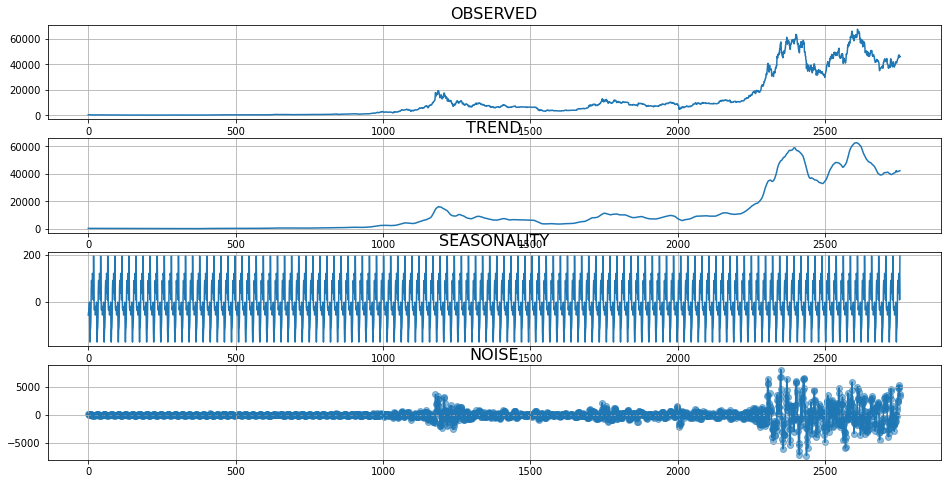

In [ ]:
decompose(df["Open"].values)


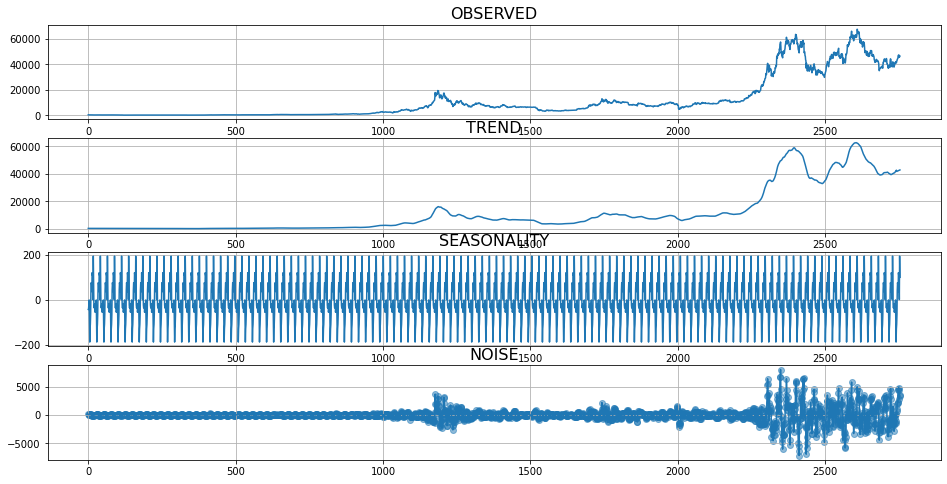

In [ ]:
decompose(df["Close"].values)

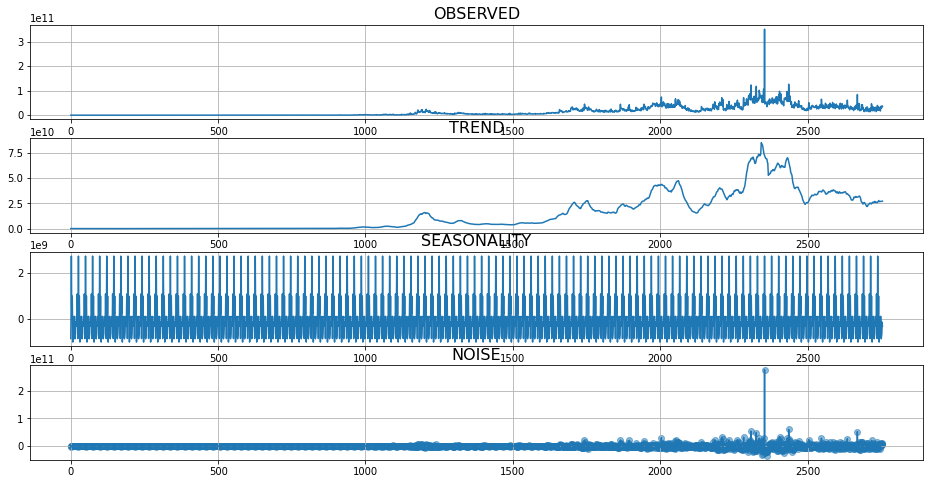

In [ ]:
decompose(df["Volume"].values)

In [ ]:
decompose(df["High"].values)

In [ ]:
decompose(df["Low"].values)

###Linear Regression

Main reason behind we select linear regression as our first prediction algorithm is that the linear regression algorithm directly addresses a line on time-series. We are trying to observe the movement and fluctuation of the Open prices with respect to time and predict it with best fit line.

To achieve that we are trying to manipulate indeces. Below we can see the manipulation on main data.

In [ ]:
df['Time'] = np.arange(len(df.index))

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups,Time
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46,2
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46,3
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46,4


We first import the LinearRegression and develop a function with given input and output values. we used our model to acquire some model predictions extracted from the given inputs and outputs.

In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'Open']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

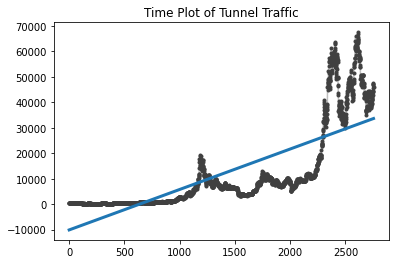

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [ ]:
df['Lag_1'] = df['Open'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups,Time,Lag_1
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46,0,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46,1,465.864014
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46,2,456.859985
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46,3,424.102997
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46,4,394.673004


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[:, 'Open']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

####Lag Plot
The lag plot shows us how well we were able to fit the relationship between the open price of one day and the open Price of the previous day.

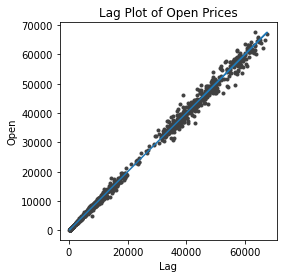

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Open')
ax.set_xlabel('Lag')
ax.set_title('Lag Plot of Open Prices');

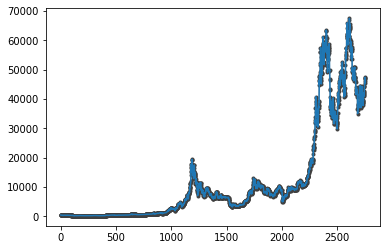

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [ ]:
print(y_pred)

1         487.629833
2         478.629928
3         445.887942
4         416.471428
5         429.877273
            ...     
2750    46822.386341
2751    47100.844686
2752    47457.142365
2753    47062.573160
2754    45555.279442
Length: 2754, dtype: float64


NARROWER RANGE TO CLARIFY THE PREDICTION ALGORITHM BEHAVIOUR

In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[2700:, ['Time']]  # features
y = df.loc[2700:, 'Open']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

To show how prediction line behave we want to squeeze the interval into more narrower range.

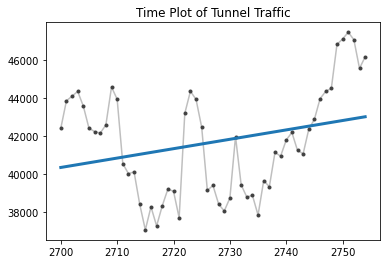

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [ ]:
df['Lag_1'] = df['Open'].shift(1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceRange,OpenGroups,Time,Lag_1
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,15.752014,176.90 - 13651.46,0,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,43.755981,176.90 - 13651.46,1,465.864014
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,43.302978,176.90 - 13651.46,2,456.859985
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,33.412994,176.90 - 13651.46,3,424.102997
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,19.244995,176.90 - 13651.46,4,394.673004


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[2700:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df.loc[2700:, 'Open']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

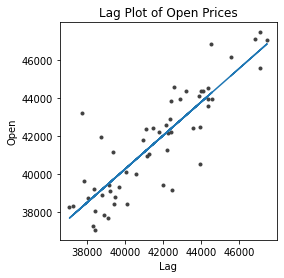

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Open')
ax.set_xlabel('Lag')
ax.set_title('Lag Plot of Open Prices');

As we can see our prediction algorithm learn well and predict nearly same with the main line. 

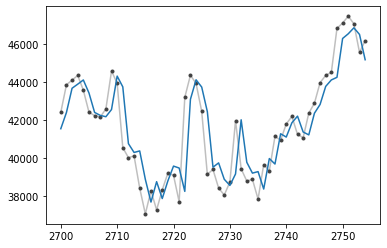

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [ ]:
print(y_pred)

###Logistic Regression

In [ ]:
from fbprophet import Prophet
dfvolume = pd.read_csv(join(path_prefix, "BTC-USD.csv"))
dfvolume = dfvolume[["Date", "Close"]]
dfvolume.columns = ["ds", "y"]
print(dfvolume)




              ds             y
0     2014-09-17    457.334015
1     2014-09-18    424.440002
2     2014-09-19    394.795990
3     2014-09-20    408.903992
4     2014-09-21    398.821014
...          ...           ...
2750  2022-03-29  47465.730469
2751  2022-03-30  47062.664063
2752  2022-03-31  45538.675781
2753  2022-04-01  46281.644531
2754  2022-04-02  46508.101563

[2755 rows x 2 columns]


In [ ]:
prophet = Prophet()
prophet.fit(dfvolume)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = prophet.make_future_dataframe(periods=365)
print(future)


             ds
0    2014-09-17
1    2014-09-18
2    2014-09-19
3    2014-09-20
4    2014-09-21
...         ...
3115 2023-03-29
3116 2023-03-30
3117 2023-03-31
3118 2023-04-01
3119 2023-04-02

[3120 rows x 1 columns]


In [ ]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)


,ds,yhat,yhat_lower,yhat_upper
2920,2022-09-15,68120.063360,60515.700724,75850.166365
2921,2022-09-16,68134.535227,60338.087173,75414.399584
2922,2022-09-17,68150.537690,60547.443380,75271.105277
2923,2022-09-18,68172.253489,60811.491291,75508.447472
2924,2022-09-19,68204.539503,60641.741959,76684.256945
...,...,...,...,...
3115,2023-03-29,83608.905779,75494.772191,91875.084014
3116,2023-03-30,83738.667971,75505.351521,91640.232534
3117,2023-03-31,83939.913516,75877.901112,92376.093001
3118,2023-04-01,84133.573588,76071.446800,92583.584211


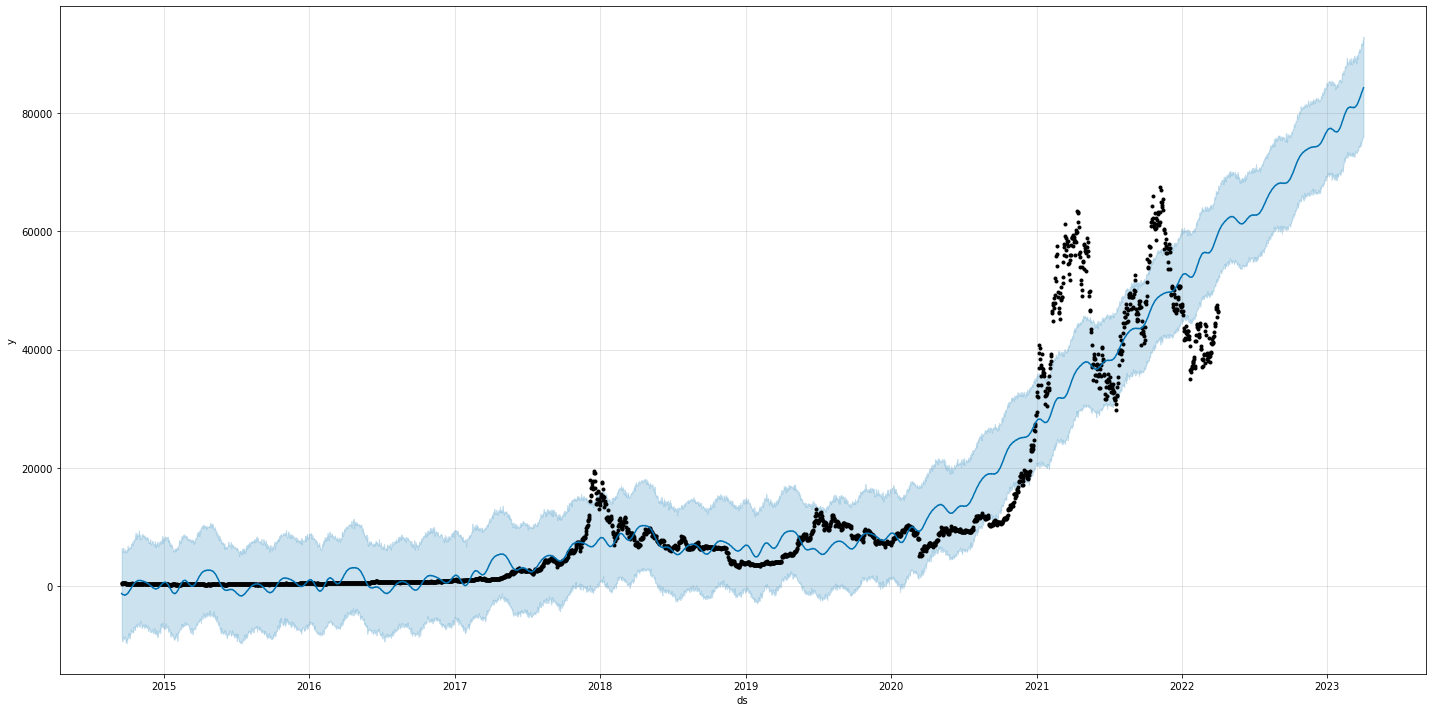

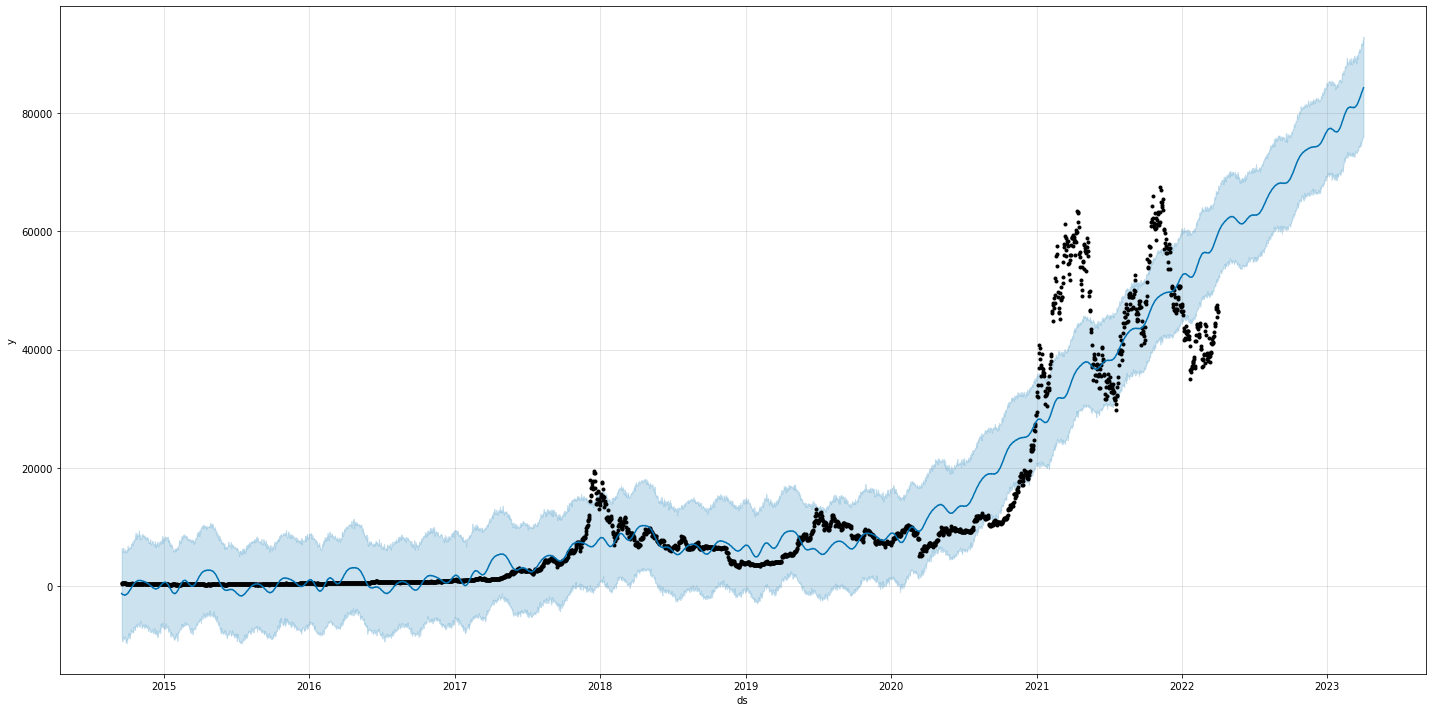

In [ ]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))

We use prophet library to predict how the trend will be in the future. Prophet is a library for forecasting. 